# Predicting Water Potability with Machine Learning and Deep Learning Techniques

By Hannah Johnston & Mahitha Sangem

April 2023

In [28]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import seed
import random
from itertools import combinations
from statsmodels.graphics.mosaicplot import mosaic

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.manifold._t_sne import TSNE
from sklearn.base import clone

!pip install scikit_learn --q
!pip install scikit-optimize --q
from skopt import BayesSearchCV
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

from mlxtend.plotting import plot_decision_regions

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Flatten, Dense, Dropout
from keras.layers import SimpleRNN, LSTM, GRU, Flatten
from keras import backend as K
from keras import layers
from keras import optimizers
from keras import utils

# Importing sckikeras for dynamic DNN build
!pip install scikeras --q
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

from collections import Counter

In [29]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [30]:
seed(0)
tf.random.set_seed(0)

In [31]:
# Import the data
waterPotabilityData = pd.read_csv('water_potability.csv')
waterPotabilityData

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [32]:
waterPotabilityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [33]:
# Check number of null values in each column
waterPotabilityData.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [34]:
# Value counts
waterPotabilityData.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [35]:
# Data shape
waterPotabilityData.shape

(3276, 10)

In [36]:
# Rows without missing values
nonMissingValRows = waterPotabilityData.dropna()
nonMissingValRows

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
6       283.651634       13.789695        84.603556   2.672989           0  
7       474.607645       12.363817        62.798309   4.401425           0  
...            ...             ...              ...        ...         ...  
3267    390.410231        9.899115        55.069304   4.613843           1  
3268    329.266002       16.217303        28.878601   3.442983           1  
3269    439.893618       16.172755        41.558501   4.369264           1  
3270    415.886955       12.067620        60.419921   3.669712           1  
3271    526.424171       13.894419        66.687695   4.435821           1  

[2011 rows x 10 columns]

In [37]:
# Save the dropped rows in a new data frame
df_dropped = waterPotabilityData[~waterPotabilityData.index.isin(nonMissingValRows.index)]
df_dropped

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
8          NaN  118.988579  14285.583854     7.804174  268.646941   
11    7.974522  218.693300  18767.656682     8.110385         NaN   
...        ...         ...           ...          ...         ...   
3266  8.372910  169.087052  14622.745494     7.547984         NaN   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
8       389.375566       12.706049        53.928846   3.595017           0  
11      364.098230       14.525746        76.485911   4.011718           0  
...            ...             ...              ...        ...         ...  
3266    464.525552       11.083027        38.435151   4.906358           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[1265 rows x 10 columns]

In [38]:
# Shuffle the dataframe because 0s and 1s are sequentially arranged
nonMissingValRows = nonMissingValRows.sample(frac=1, random_state=0).reset_index(drop=True)
nonMissingValRows

ph    Hardness        Solids  Chloramines     Sulfate  \
0      6.505873  240.287912  29534.690292     6.775277  341.728239   
1      6.266800  187.829617  27577.213623     9.141597  322.917848   
2      8.527142  217.394778   3413.081633     5.670027  337.631073   
3      5.251354  167.924336  34768.933420     4.023081  377.143489   
4      5.664846  186.648359  18678.950811     5.153873  313.083489   
...         ...         ...           ...          ...         ...   
2006   6.453065  178.998245  23129.460178     6.354508  326.853185   
2007   7.201702  147.711086  37308.994159     5.677451  279.164446   
2008   7.117579  186.199680  31528.948690     6.387037  335.348881   
2009  10.282068  198.546363   8108.297322     5.548407  332.017935   
2010   7.269652  155.157520  31161.368388     3.181183  244.795198   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       265.251199       13.570223        93.166465   4.497529           1  
1       277.050802       13.290252        59.454325   3.652845           1  
2       615.611167       14.926751        82.590152   2.649424           0  
3       315.536105       10.429159        70.593387   4.072252           1  
4       335.505521       17.551570        59.571837   3.570290           0  
...            ...             ...              ...        ...         ...  
2006    371.882763       13.178301        41.525863   3.440859           0  
2007    395.976824       13.326125        63.626894   3.883250           1  
2008    380.578265       19.073996        75.903072   4.333402           0  
2009    568.078980       15.661692        28.770619   4.572923           0  
2010    506.010135       17.385515        73.115053   3.789237           1  

[2011 rows x 10 columns]

In [39]:
# Separate x_train, y_train,x_test and y_test after separating features and labels
waterPotabilityData_features = nonMissingValRows.drop(['Potability'], axis = 1) # Dropping target label from features set
waterPotabilityData_labels = nonMissingValRows['Potability'] # Target label

x_tr,x_test,y_tr,y_test = train_test_split(waterPotabilityData_features,waterPotabilityData_labels,test_size=0.3,random_state=0, stratify = waterPotabilityData_labels)

print("y_train:\n", y_tr.value_counts())
print("y_test:\n", y_test.value_counts())

y_train:
 0    840
1    567
Name: Potability, dtype: int64
y_test:
 0    360
1    244
Name: Potability, dtype: int64


In [40]:
# Updated training
x_tr

ph    Hardness        Solids  Chloramines     Sulfate  \
1340   7.031684  201.002106  24510.507558     5.818274  401.268832   
1290   6.532097  163.396241   8240.812709     6.641543  402.836817   
987   10.581386  213.776439  11298.450091     7.668897  300.184622   
435   10.386133  200.891192  17982.387256     5.845502  338.999274   
1760   6.953864  209.638293  10575.186281     4.462707  315.606594   
...         ...         ...           ...          ...         ...   
344    8.069298  191.004107  16654.509370     8.038213  350.577950   
1926   6.581083  217.538504  24480.671795     5.837152  310.632910   
1777   5.230454  152.094169  24790.724599     6.308730  388.998079   
597    7.543700  161.623142  19116.012084     8.493407  289.959953   
1621   4.723313  252.274895  22833.192042     5.922451  378.560304   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1340    371.616397       12.846819        89.192433   4.422183  
1290    601.032982       17.896128        55.022407   4.599324  
987     497.169128       17.971295        83.345304   2.966946  
435     336.279707       14.319411        62.156686   4.921341  
1760    391.184315       13.285334        87.390889   3.195710  
...            ...             ...              ...        ...  
344     418.200072       12.293770        49.009256   3.021382  
1926    476.458667       11.434239        48.551910   3.511370  
1777    307.918075       12.594197        51.625213   3.695615  
597     440.283446       13.336770        80.243237   3.630537  
1621    411.295025       16.584571        66.728402   3.917587  

[1407 rows x 9 columns]

In [41]:
# Join the y potability column with the others
tr_data = pd.concat([x_tr, y_tr], axis=1, join='inner')
tr_data

ph    Hardness        Solids  Chloramines     Sulfate  \
1340   7.031684  201.002106  24510.507558     5.818274  401.268832   
1290   6.532097  163.396241   8240.812709     6.641543  402.836817   
987   10.581386  213.776439  11298.450091     7.668897  300.184622   
435   10.386133  200.891192  17982.387256     5.845502  338.999274   
1760   6.953864  209.638293  10575.186281     4.462707  315.606594   
...         ...         ...           ...          ...         ...   
344    8.069298  191.004107  16654.509370     8.038213  350.577950   
1926   6.581083  217.538504  24480.671795     5.837152  310.632910   
1777   5.230454  152.094169  24790.724599     6.308730  388.998079   
597    7.543700  161.623142  19116.012084     8.493407  289.959953   
1621   4.723313  252.274895  22833.192042     5.922451  378.560304   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1340    371.616397       12.846819        89.192433   4.422183           0  
1290    601.032982       17.896128        55.022407   4.599324           0  
987     497.169128       17.971295        83.345304   2.966946           0  
435     336.279707       14.319411        62.156686   4.921341           0  
1760    391.184315       13.285334        87.390889   3.195710           0  
...            ...             ...              ...        ...         ...  
344     418.200072       12.293770        49.009256   3.021382           1  
1926    476.458667       11.434239        48.551910   3.511370           0  
1777    307.918075       12.594197        51.625213   3.695615           1  
597     440.283446       13.336770        80.243237   3.630537           1  
1621    411.295025       16.584571        66.728402   3.917587           0  

[1407 rows x 10 columns]

In [42]:
# Add back in the dropped rows
train_data = tr_data.append(df_dropped)
train_data = train_data.reset_index(drop=True)
train_data

ph    Hardness        Solids  Chloramines     Sulfate  \
0      7.031684  201.002106  24510.507558     5.818274  401.268832   
1      6.532097  163.396241   8240.812709     6.641543  402.836817   
2     10.581386  213.776439  11298.450091     7.668897  300.184622   
3     10.386133  200.891192  17982.387256     5.845502  338.999274   
4      6.953864  209.638293  10575.186281     4.462707  315.606594   
...         ...         ...           ...          ...         ...   
2667   8.372910  169.087052  14622.745494     7.547984         NaN   
2668   7.808856  193.553212  17329.802160     8.061362         NaN   
2669   9.419510  175.762646  33155.578218     7.350233         NaN   
2670   5.126763  230.603758  11983.869376     6.303357         NaN   
2671   7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       371.616397       12.846819        89.192433   4.422183           0  
1       601.032982       17.896128        55.022407   4.599324           0  
2       497.169128       17.971295        83.345304   2.966946           0  
3       336.279707       14.319411        62.156686   4.921341           0  
4       391.184315       13.285334        87.390889   3.195710           0  
...            ...             ...              ...        ...         ...  
2667    464.525552       11.083027        38.435151   4.906358           1  
2668    392.449580       19.903225              NaN   2.798243           1  
2669    432.044783       11.039070        69.845400   3.298875           1  
2670    402.883113       11.168946        77.488213   4.708658           1  
2671    327.459760       16.140368        78.698446   2.309149           1  

[2672 rows x 10 columns]

## Imputation on the training data

In [43]:
from scipy.stats import trim_mean

# Calculate the trimmed mean for each column
tm = train_data.apply(lambda x: trim_mean(x, 0.1) if x.isna().sum() == 0 else x.mean(), axis=0)

# Fill the missing values with the trimmed mean
train_data = train_data.fillna(value=tm)

# Shuffle the dataframe
train_data = train_data.sample(frac=1, random_state=0).reset_index(drop=True)

# Separate x_train, y_train, x_val, y_val, x_test and y_test after separating features and labels
# Dropping target label from features set
train_data_features = train_data.drop(['Potability'], axis = 1) 
# Target label
train_data_labels = train_data['Potability'] 

# Split them
x_train,x_val,y_train,y_val = train_test_split(train_data_features,
                                               train_data_labels,
                                               test_size=0.2,
                                               random_state=0, 
                                               stratify=train_data_labels)

print("y_train:\n", y_train.value_counts())
print("y_val:\n", y_val.value_counts())

y_train:
 0    1310
1     827
Name: Potability, dtype: int64
y_val:
 0    328
1    207
Name: Potability, dtype: int64


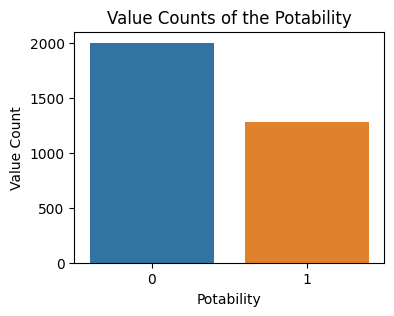

   Potability  Value Count
0           0         1998
1           1         1278


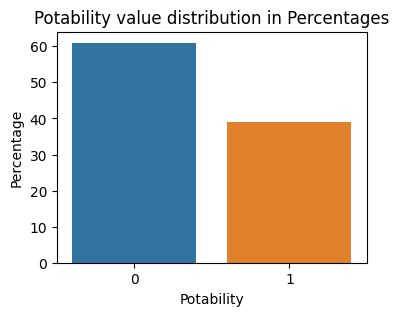

   Potability  counts  Percentage
0           0    1998    60.98901
1           1    1278    39.01099


In [44]:
# Display value counts for Potability
feature = "Potability"

# Get value counts for each unique value present in the attack column
feature_value_counts = waterPotabilityData[feature].value_counts() 

#Convert the series into Dataframe object
feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,
                                     'Value Count':feature_value_counts.values}) 

# Plot the value counts
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Value Count",data=feature_value_counts) 
s.set_xticklabels(s.get_xticklabels()) 
s.set_title("Value Counts of the "+feature) 
plt.show()
print(feature_value_counts)

# Get value counts for each unique value present in the attack column
feature_percentages = waterPotabilityData[feature].value_counts().reset_index(name ="counts") 

# Replace index name with attack
feature_percentages.rename(columns = {'index':feature}, inplace = True) 

# Compute the percentage value
feature_percentages["Percentage"] = feature_percentages["counts"].apply(
    lambda x:round(x*100/feature_percentages["counts"].sum(),5)) 

# Plot the percentage values
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Percentage",data=feature_percentages) 
s.set_title(feature+" value distribution in Percentages") 
s.set_xticklabels(s.get_xticklabels())
plt.show()
print(feature_percentages)

<Axes: >

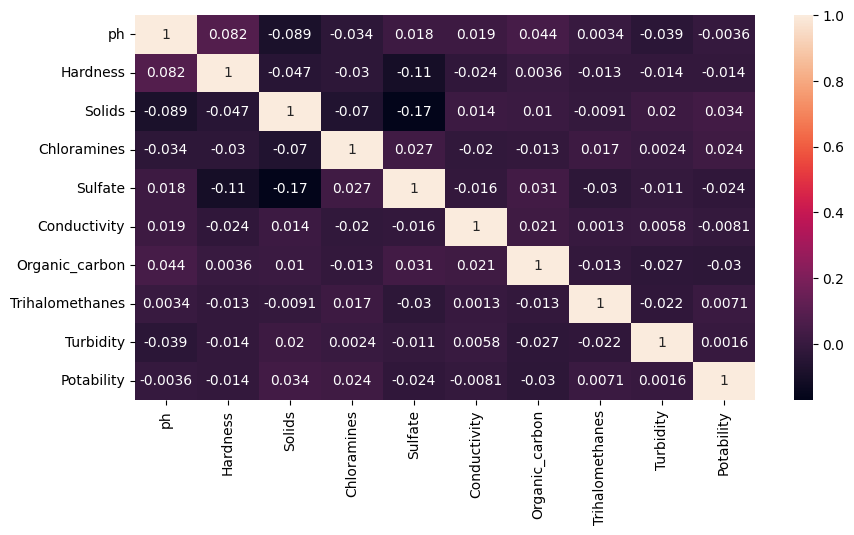

In [45]:
# Plot the feature correlations
plt.figure(figsize = (10,5))
sns.heatmap(waterPotabilityData.corr(), annot = True)

In [46]:
# Identify the strongest feature correlations
corr = waterPotabilityData.corr()
corr_potability = corr.reindex(corr["Potability"].abs().sort_values(ascending=False).index)
corr_potability = corr_potability["Potability"]
corr_potability = pd.DataFrame (corr_potability)
corr_potability=(corr_potability.style.background_gradient(cmap ='Blues'))
corr_potability

## Feature Visualization & Analysis

In [47]:
# Visualization
# Function to analyze the numerical features in the dataset
def plot_numerical_features(feature,data=waterPotabilityData):
  print("Data Analysis of feature: {}".format(feature))
  # Histogram
  plt.figure(figsize=(3,3))
  plt.hist(waterPotabilityData[feature], bins=25)
  plt.ylabel("Frequency")
  plt.title("Histogram plot for {}".format(feature))
  plt.show()

  #Plot value counts of all the records present in the data
  plt.figure(figsize=(3,3))
  s = sns.FacetGrid(data, hue="Potability").map(sns.distplot, feature).add_legend(); 
  s.fig.suptitle("Univariate analysis of the feature {}".format(feature))
  plt.show()
  print("Box Plots to analyze the {} distribution".format(feature))

  # Plot the box plot for the data distribution of the feature
  plt.figure(figsize=(3,3))
  s = sns.boxplot(x='Potability',y=feature, data=data) 
  s.set_title("Box Plot for the feature "+feature)
  plt.show()

  # Print the min, max, 25th, 50th , 75th etc., statistical value for all the records
  print(data[feature].describe()) 
  print("="*100)

Analysis of ph
Data Analysis of feature: ph


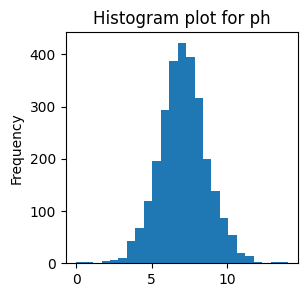

<Figure size 300x300 with 0 Axes>

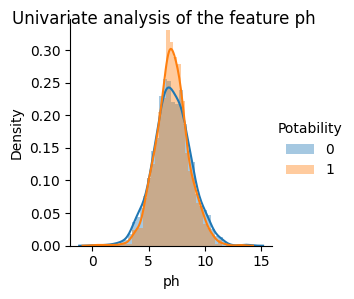

Box Plots to analyze the ph distribution


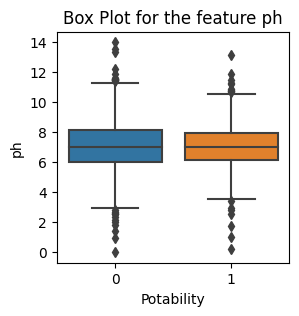

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64
Analysis of Hardness
Data Analysis of feature: Hardness


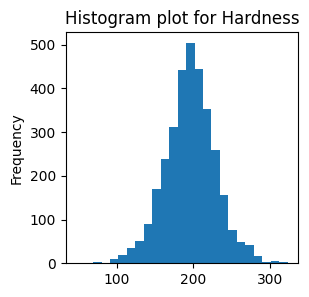

<Figure size 300x300 with 0 Axes>

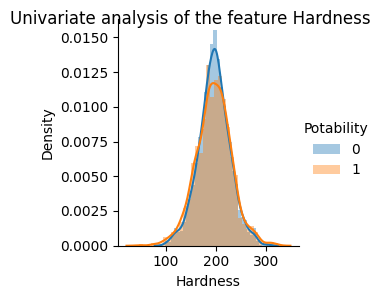

Box Plots to analyze the Hardness distribution


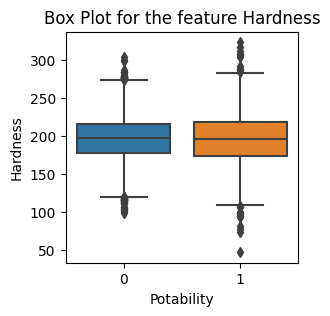

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64
Analysis of Solids
Data Analysis of feature: Solids


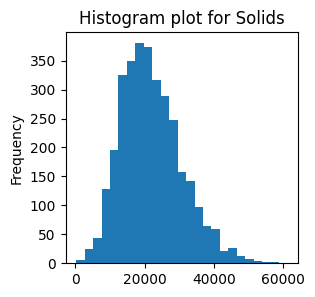

<Figure size 300x300 with 0 Axes>

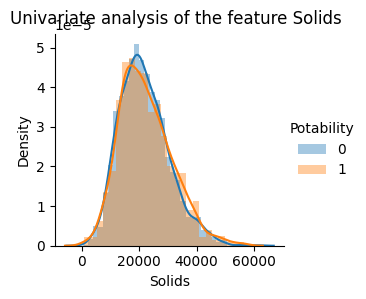

Box Plots to analyze the Solids distribution


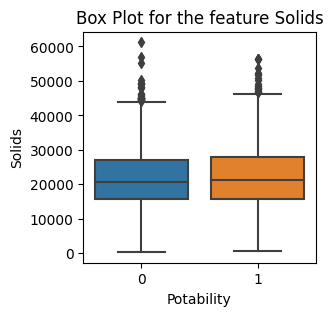

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64
Analysis of Chloramines
Data Analysis of feature: Chloramines


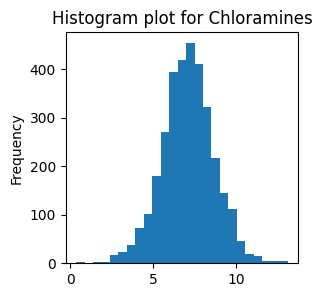

<Figure size 300x300 with 0 Axes>

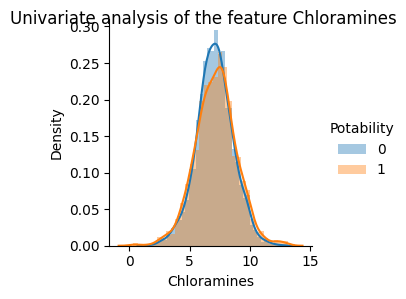

Box Plots to analyze the Chloramines distribution


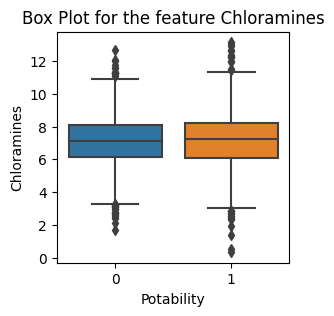

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64
Analysis of Sulfate
Data Analysis of feature: Sulfate


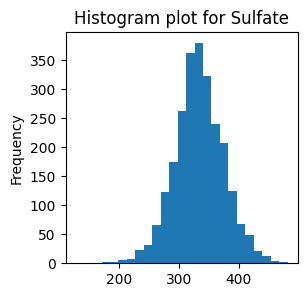

<Figure size 300x300 with 0 Axes>

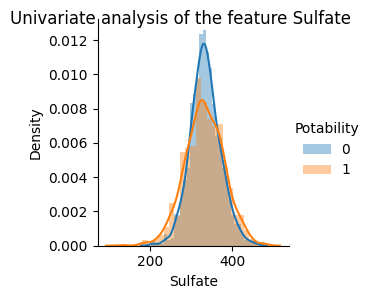

Box Plots to analyze the Sulfate distribution


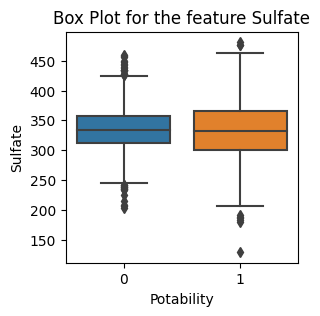

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64
Analysis of Conductivity
Data Analysis of feature: Conductivity


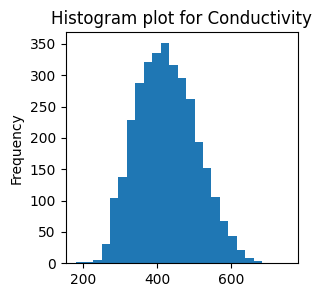

<Figure size 300x300 with 0 Axes>

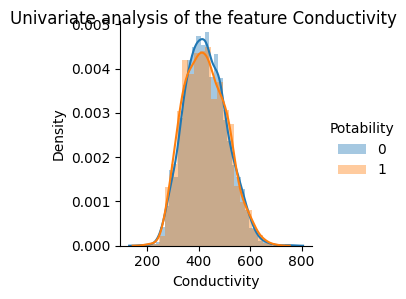

Box Plots to analyze the Conductivity distribution


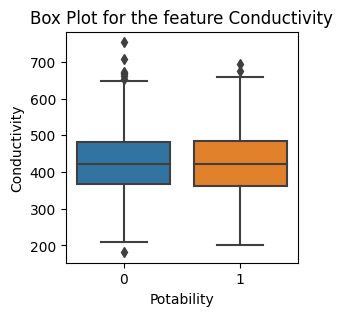

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64
Analysis of Organic_carbon
Data Analysis of feature: Organic_carbon


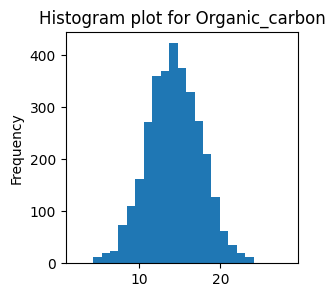

<Figure size 300x300 with 0 Axes>

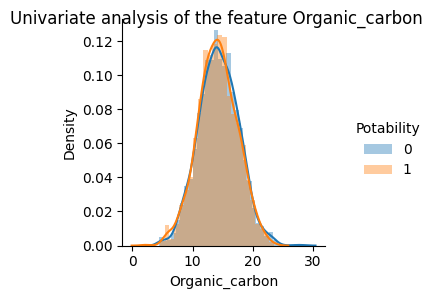

Box Plots to analyze the Organic_carbon distribution


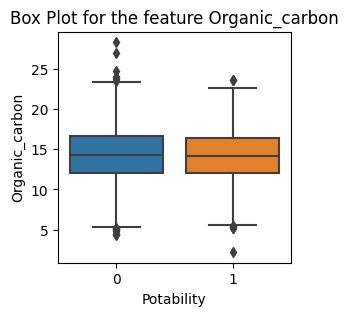

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64
Analysis of Trihalomethanes
Data Analysis of feature: Trihalomethanes


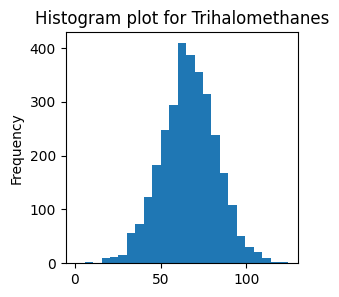

<Figure size 300x300 with 0 Axes>

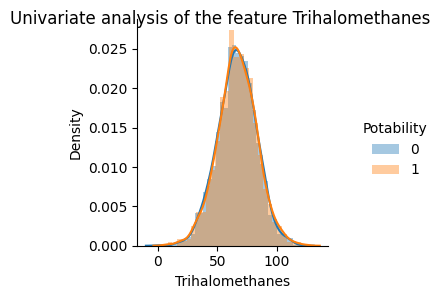

Box Plots to analyze the Trihalomethanes distribution


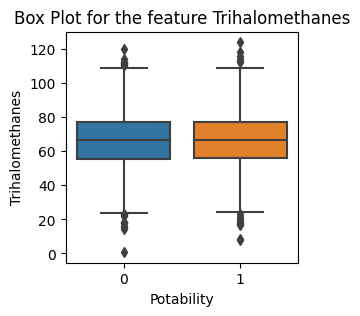

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64
Analysis of Turbidity
Data Analysis of feature: Turbidity


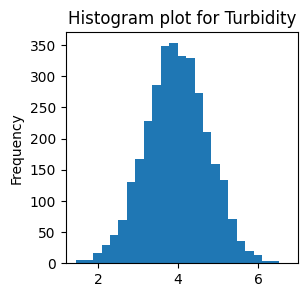

<Figure size 300x300 with 0 Axes>

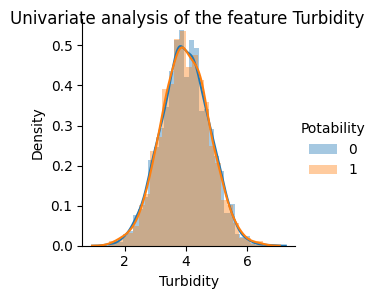

Box Plots to analyze the Turbidity distribution


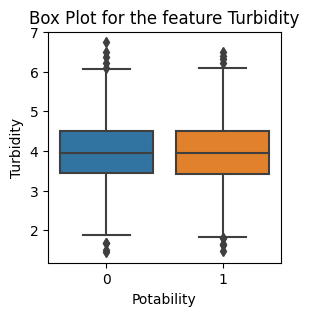

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64


In [48]:
# Loop through all features
cols = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
for col in cols:
    print("Analysis of {}".format(col))
    plot_numerical_features(col)


## Scaling

In [151]:
# Scaling
def scaling(x_data):
  st = StandardScaler()
  x_columns= x_data.columns
  x_data[x_columns] = st.fit_transform(x_data[x_columns])

# Scale all of the data: train, validation, test
scaling(x_train)
scaling(x_val)
scaling(x_test)

# Tabulate results
results_table = []

## Functions to calculate and display metrics

In [152]:
# Print metrics
def print_metrics(model, y_pred, classifier, model_history=None, all_charts=True):
  
  if model_history is not None:
    # create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # plot accuracy
    axs[0].plot(model_history['accuracy'])
    axs[0].plot(model_history['val_accuracy'])
    axs[0].set_title('Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validate'], loc='upper left')

    # plot loss
    axs[1].plot(model_history['loss'])
    axs[1].plot(model_history['val_loss'])
    axs[1].set_title('Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validate'], loc='upper right')

    # plot F1-score
    axs[2].plot(model_history['f1_m'])
    axs[2].plot(model_history['val_f1_m'])
    axs[2].set_title('F1-Score')
    axs[2].set_ylabel('F1')
    axs[2].set_xlabel('Epoch')
    axs[2].legend(['Train', 'Validate'], loc='upper left')

    # adjust the layout and spacing
    plt.tight_layout()

    # show the plot
    plt.show()

  # Create a figure with three subplots
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Plot confusion matrix in the first subplot
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])
  axs[0].set_xlabel('True label')
  axs[0].set_ylabel('Predicted label')
  axs[0].set_title('Confusion Matrix')

  # Plot Precision-Recall curve in the second subplot
  if all_charts is True:
      prCurve = PrecisionRecallDisplay.from_estimator(model, x_test, y_test, ax=axs[1])
  else:
      prCurve = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=axs[1])
  _ = prCurve.ax_.set_title("Precision-Recall curve")

  # Plot ROC curve in the third subplot
  if all_charts is True:
      rocCurve = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=axs[2])
  else:
      rocCurve = RocCurveDisplay.from_predictions(y_test, y_pred, ax=axs[2])

  _ = rocCurve.ax_.set_title("Receiver Operating Characteristic (ROC) curve")
  _ = axs[2].set_xlabel('False Positive Rate')
  _ = axs[2].set_ylabel('True Positive Rate')

  # Adjust the layout and spacing
  plt.tight_layout()

  # Show the plot
  plt.show()
  
  # Obtain f1-score, precision and Recall values to determine the performance of the model
  f1Score = f1_score(y_test, y_pred)
  precisionVal = precision_score(y_test, y_pred)
  recallVal = recall_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)

  print("{}".format(classifier))
  print("f1-score: {:.2f}%".format(f1Score*100))
  print("Precision: {:.2f}%".format(precisionVal*100))
  print("Recall: {:.2f}%".format(recallVal*100))
  print("Accuracy: {:.2f}%".format(acc*100))

  return[classifier, f1Score*100, precisionVal*100, recallVal*100, acc*100]

In [153]:
from sklearn.metrics import log_loss

# Run predictions
def finalPrediction(model, classifier, results_table, all_charts=True, reshape=False):
  
  # Fit on train data
  model.fit(x_train, y_train) 

   # Predict on test data
  y_pred = model.predict(x_test)
  
  # Tabulate results
  result_list = print_metrics(model, y_pred, classifier, None, all_charts=all_charts)
  results_table.append(result_list)

## Model building

Decision Tree classifier with hyperparameter tuning

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=13,
                       min_samples_leaf=3, min_samples_split=4, random_state=0)


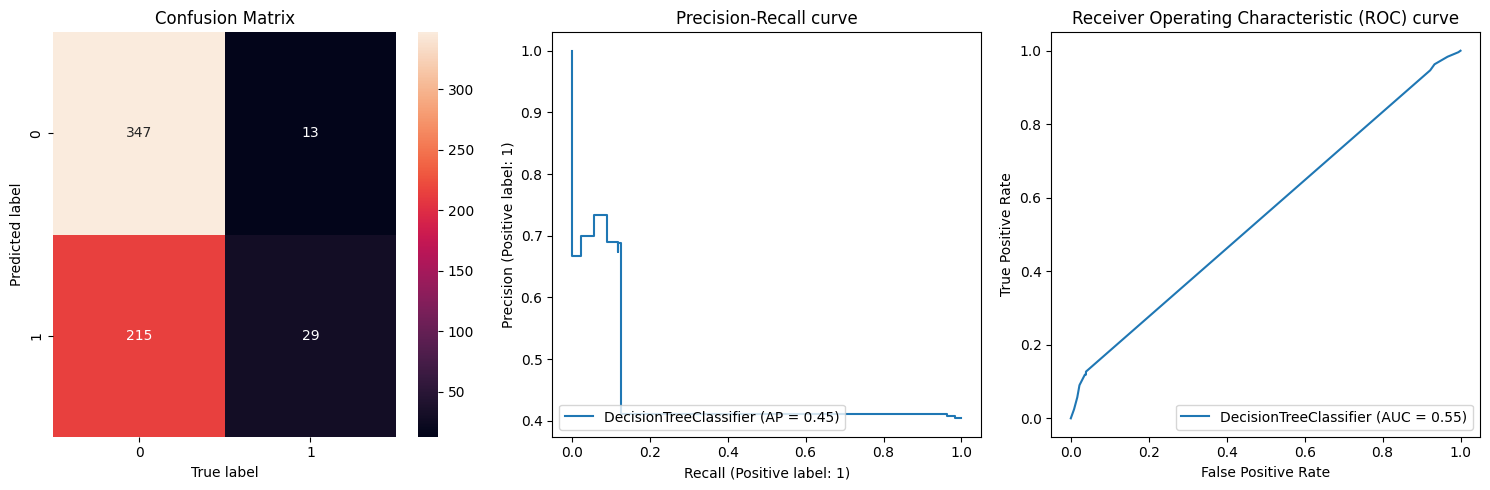

Decision Tree classifier with hyperparameter tuning
f1-score: 20.28%
Precision: 69.05%
Recall: 11.89%
Accuracy: 62.25%


In [154]:
# Instantiate the DT classifier
dt = DecisionTreeClassifier(random_state=0)

# Define the parameter grid to search over
params = {'max_leaf_nodes': list(range(2, 15)),
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': list(range(1, 5)) + [None],
              'min_samples_split': list(range(2, 10)),
              'min_samples_leaf': list(range(1, 5))}

bayes = BayesSearchCV(dt, 
                      search_spaces=params, 
                      n_iter=5, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring = "f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

dt_best = bayes.best_estimator_
print(dt_best)
finalPrediction(dt_best, "Decision Tree classifier with hyperparameter tuning", results_table)

Decision Tree classifier with upsampling using ADASYN and hyperparameter tuning

Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('dt',
                 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=9,
                                        min_samples_leaf=3, min_samples_split=8,
                                        splitter='random'))])


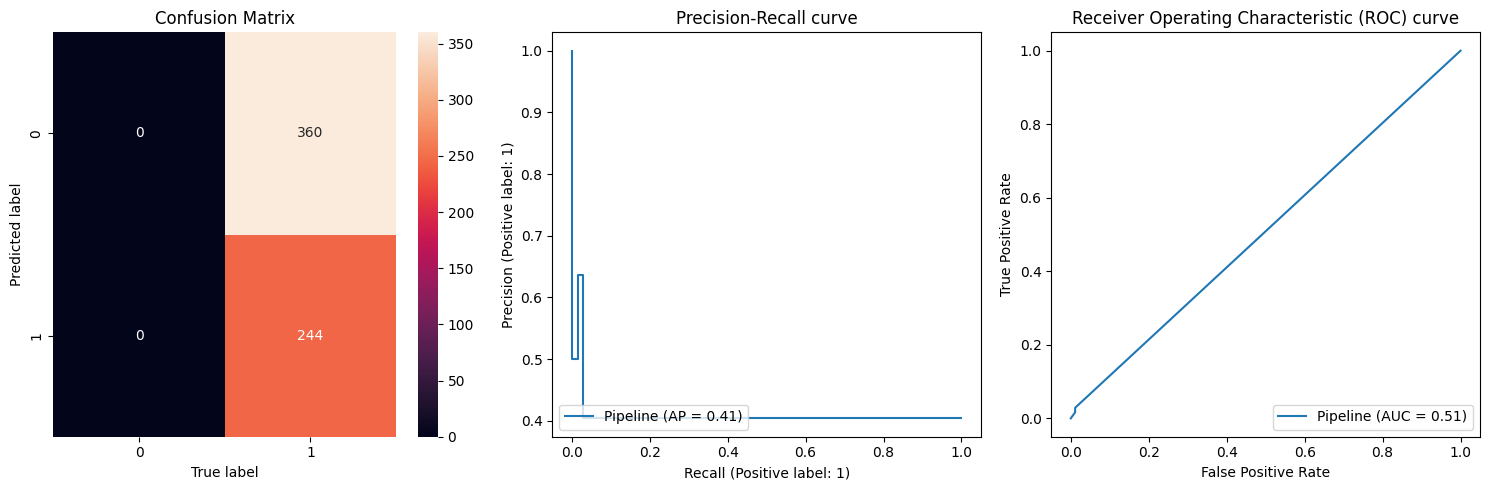

Decision Tree Classifier with ADASYN and hyperparameter tuning
f1-score: 57.55%
Precision: 40.40%
Recall: 100.00%
Accuracy: 40.40%


In [155]:
# instantiate the DT classifier
dt = DecisionTreeClassifier()
adasyn = ADASYN(random_state=0)

# define the parameter grid to search over
params = {'dt__max_leaf_nodes': list(range(2, 15)),
              'dt__criterion': ['gini', 'entropy'],
              'dt__splitter': ['best', 'random'],
              'dt__max_depth': list(range(1, 5)) + [None],
              'dt__min_samples_split': list(range(2, 10)),
              'dt__min_samples_leaf': list(range(1, 5))}

# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('dt',dt)])

bayes = BayesSearchCV(pipeline, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring = "f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

dt_best_adasyn = bayes.best_estimator_
print(dt_best_adasyn)
finalPrediction(dt_best_adasyn, "Decision Tree Classifier with ADASYN and hyperparameter tuning", results_table)

Naive Bayes Gaussian classifier with hyperparameter tuning

GaussianNB(var_smoothing=1e-08)


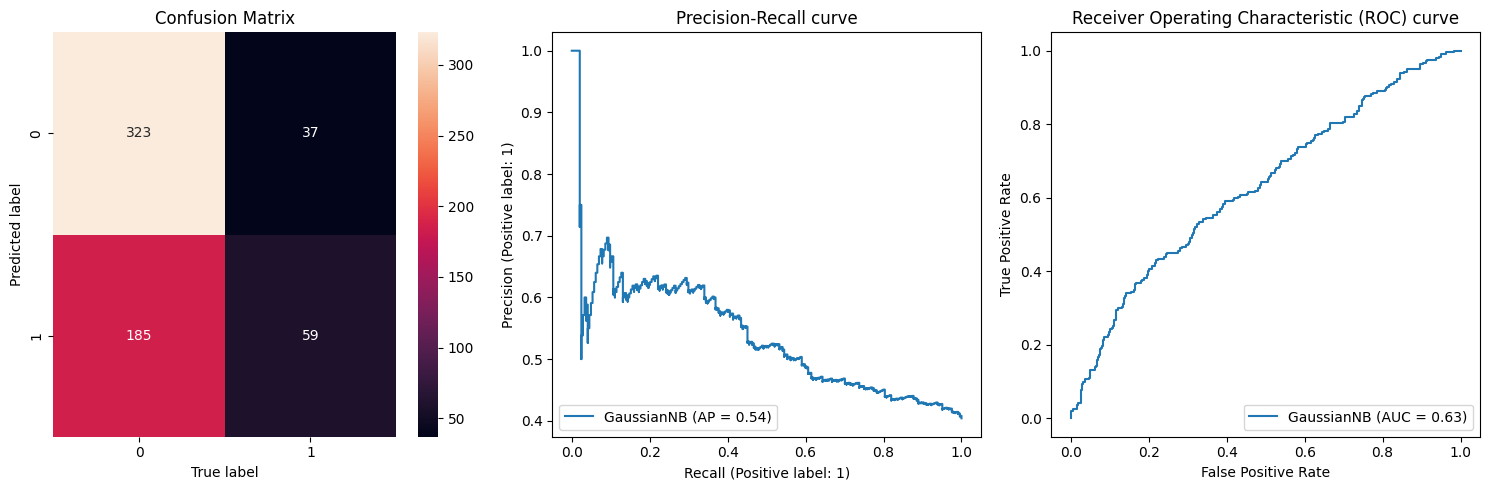

Naive Bayes Gaussian classifier with hyperparameter tuning
f1-score: 34.71%
Precision: 61.46%
Recall: 24.18%
Accuracy: 63.25%


In [156]:
# Instantiate the NBG classifier
gnb = GaussianNB()

# Define the parameter grid to search over
params = {
    'var_smoothing': [1e-07, 1e-08, 1e-09],
}

bayes = BayesSearchCV(estimator=gnb, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1",
                      random_state=0)
bayes.fit(x_val, y_val)

nbg_best = bayes.best_estimator_
print(nbg_best)
finalPrediction(nbg_best, "Naive Bayes Gaussian classifier with hyperparameter tuning", results_table)

Naive Bayes Gaussian classifier with upsampling using ADASYN and with hyperparameter tuning

GaussianNB(var_smoothing=1e-08)


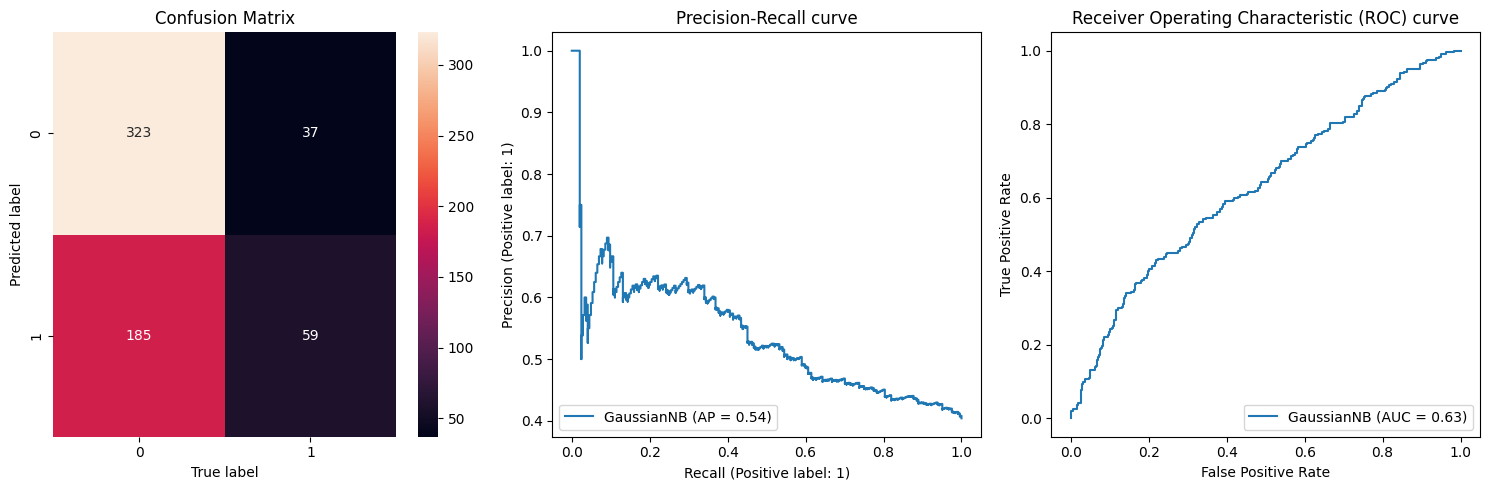

Naive Bayes Gaussian Classifier with ADASYN and hyperparameter tuning
f1-score: 34.71%
Precision: 61.46%
Recall: 24.18%
Accuracy: 63.25%


In [157]:
# Instantiate the NBG classifier
gnb = GaussianNB()

# Define the parameter grid to search over
params = {
    'var_smoothing': [1e-07, 1e-08, 1e-09],
}
adasyn = ADASYN(random_state=0)

# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('gnb',gnb)])

bayes = BayesSearchCV(estimator=gnb, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

nbg_best_adasyn = bayes.best_estimator_
print(nbg_best_adasyn)
finalPrediction(nbg_best_adasyn, "Naive Bayes Gaussian Classifier with ADASYN and hyperparameter tuning", results_table)

KNN Classifier with hyperparameter tuning

KNeighborsClassifier(n_neighbors=1)


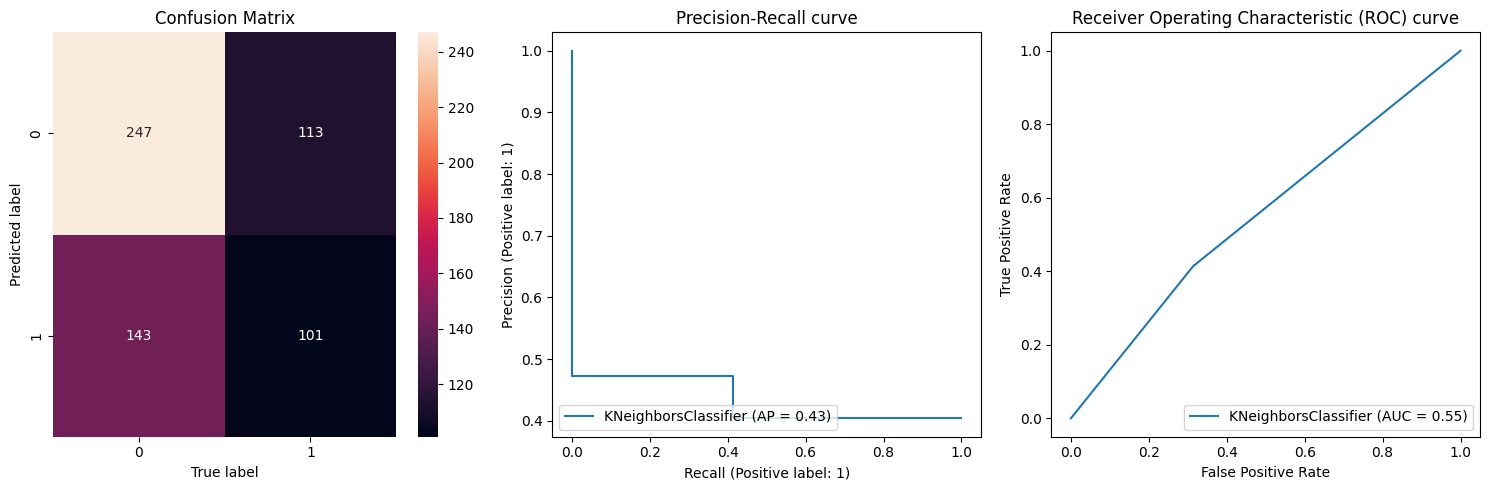

K Nearest Neighbors Classifier with hyperparameter tuning
f1-score: 44.10%
Precision: 47.20%
Recall: 41.39%
Accuracy: 57.62%


In [158]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Implement cross validation for hyperparameter tuning from the given set of parameter values
rangeK = list(range(1, 10 , 1))
params = dict(n_neighbors = rangeK)

# Perform bayes search with 5 folds and with f1 score as the metric for performance evaluation
bayes = BayesSearchCV(estimator=knn, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

knn_best = bayes.best_estimator_
print(knn_best)
finalPrediction(knn_best, "K Nearest Neighbors Classifier with hyperparameter tuning", results_table)

KNN Classifier with upsampling using ADASYN and hyperparameter tuning

Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])


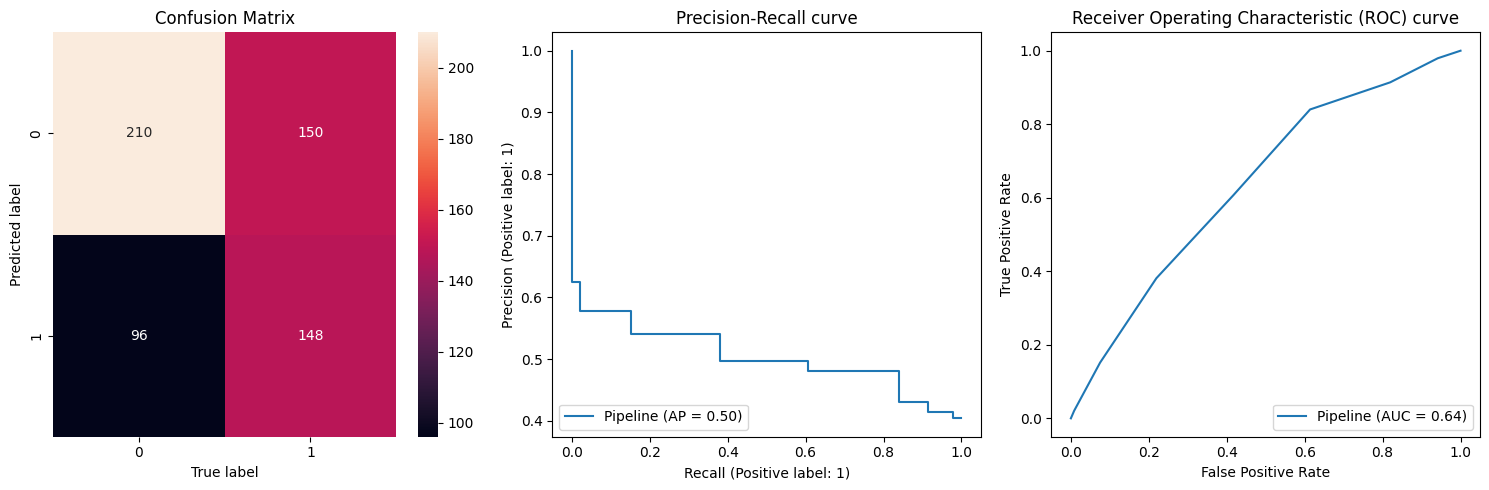

K Nearest Neighbors Classifier with ADASYN and hyperparameter tuning
f1-score: 54.61%
Precision: 49.66%
Recall: 60.66%
Accuracy: 59.27%


In [159]:
# Instantiate the classifier
knn = KNeighborsClassifier()
adasyn = ADASYN(random_state=0)

# Implement cross validation for hyperparameter tuning from the given set of parameter values
rangeK = list(range(1, 10 , 1))
params = dict(knn__n_neighbors = rangeK)

# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('knn',knn)])

bayes = BayesSearchCV(pipeline, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

knn_best_adasyn = bayes.best_estimator_
print(knn_best_adasyn)
finalPrediction(knn_best_adasyn, "K Nearest Neighbors Classifier with ADASYN and hyperparameter tuning", results_table)

# Fit on train data
knn_best_adasyn.fit(x_train, y_train) 

# Predict on test data
y_pred_knn_ada = knn_best_adasyn.predict(x_test)

Support Vector Machine with hyperparameter tuning

SVC(C=10.0, gamma=0.1, kernel='linear', max_iter=264, probability=True,
    random_state=0)


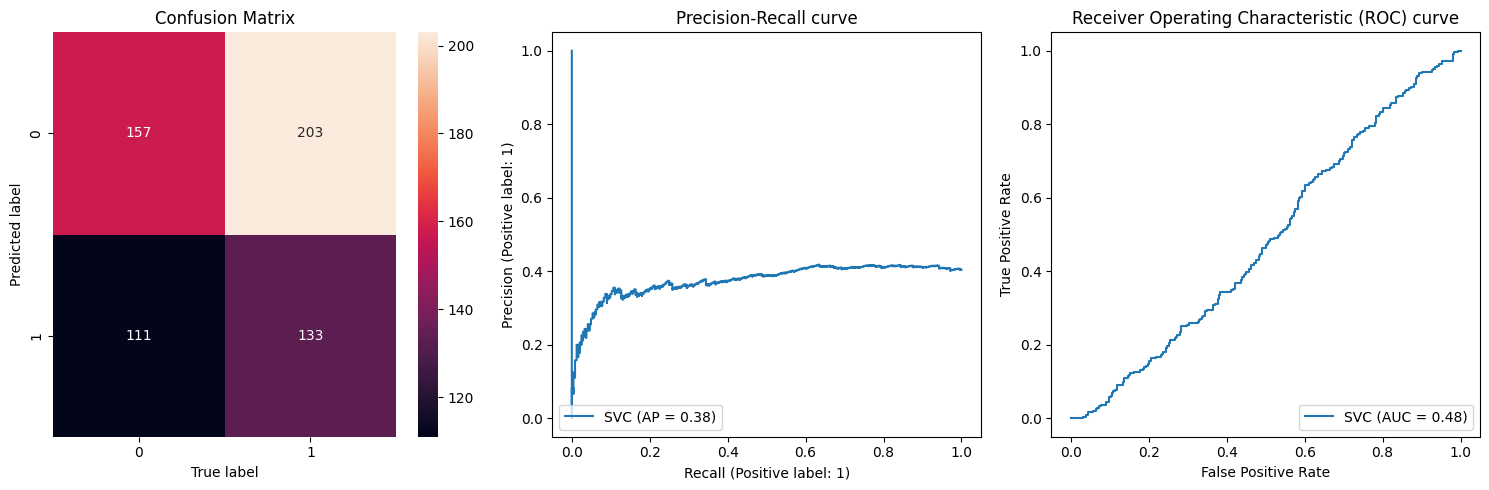

SVM Classifier with hyperparameter tuning
f1-score: 45.86%
Precision: 39.58%
Recall: 54.51%
Accuracy: 48.01%


In [160]:
# Instantiate the classifier
svc = svm.SVC(random_state=0, probability=True)

# Define the parameter grid
params = {'C': [0.1, 1, 10], 
          'kernel': ['linear', 'rbf'], 
          'gamma': [0.1, 1],
          'max_iter': [200, 300]}

bayes = BayesSearchCV(estimator=svc, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

svm_best = bayes.best_estimator_
print(svm_best)
finalPrediction(svm_best, "SVM Classifier with hyperparameter tuning", results_table)

Support Vector Machine with upsampling using ADASYN and with hyperparameter tuning

Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svc',
                 SVC(C=0.1, gamma=0.906555356072811, max_iter=293,
                     probability=True, random_state=0))])


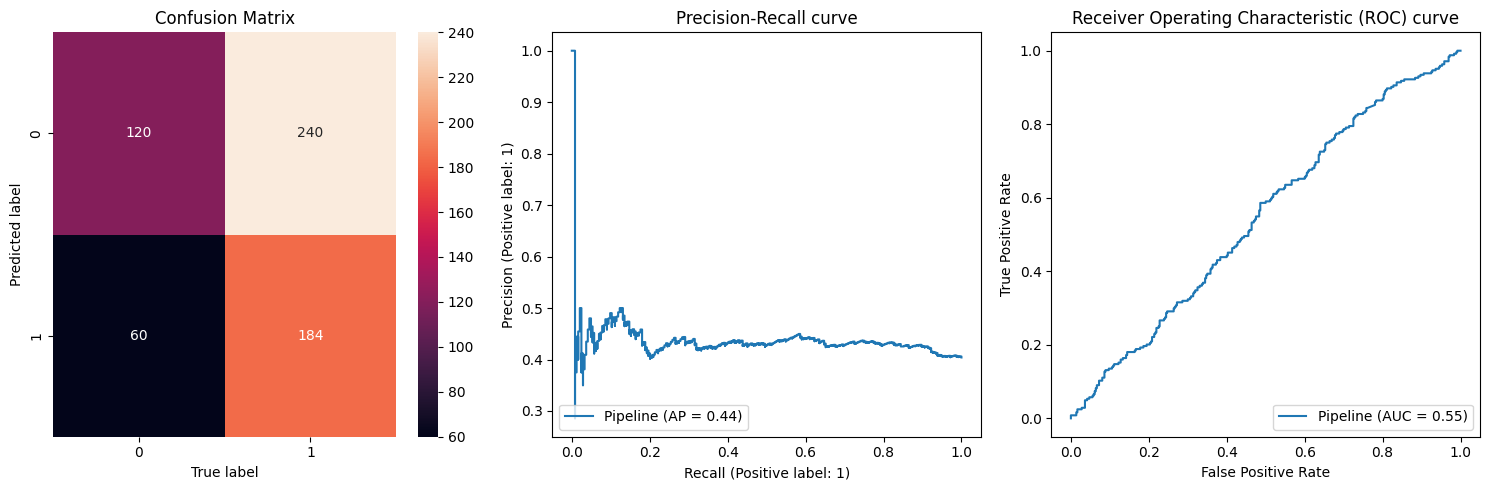

SVM Classifier with ADASYN and hyperparameter tuning
f1-score: 55.09%
Precision: 43.40%
Recall: 75.41%
Accuracy: 50.33%


In [161]:
# Instantiate the classifier
svc = svm.SVC(random_state=0, probability=True)
adasyn = ADASYN(random_state=0)

# Define the parameter grid
params = {'svc__C': [0.1, 1, 10], 
          'svc__kernel': ['linear', 'rbf'], 
          'svc__gamma': [0.1, 1],
          'svc__max_iter': [200, 300]}

# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('svc',svc)])

bayes = BayesSearchCV(pipeline, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1",
                      random_state=0)
bayes.fit(x_val, y_val)

svm_best_adasyn = bayes.best_estimator_
print(svm_best_adasyn)
finalPrediction(svm_best_adasyn, "SVM Classifier with ADASYN and hyperparameter tuning", results_table)

MLP classifier with hyperparameter tuning

MLPClassifier(hidden_layer_sizes=50, max_iter=400, random_state=0)


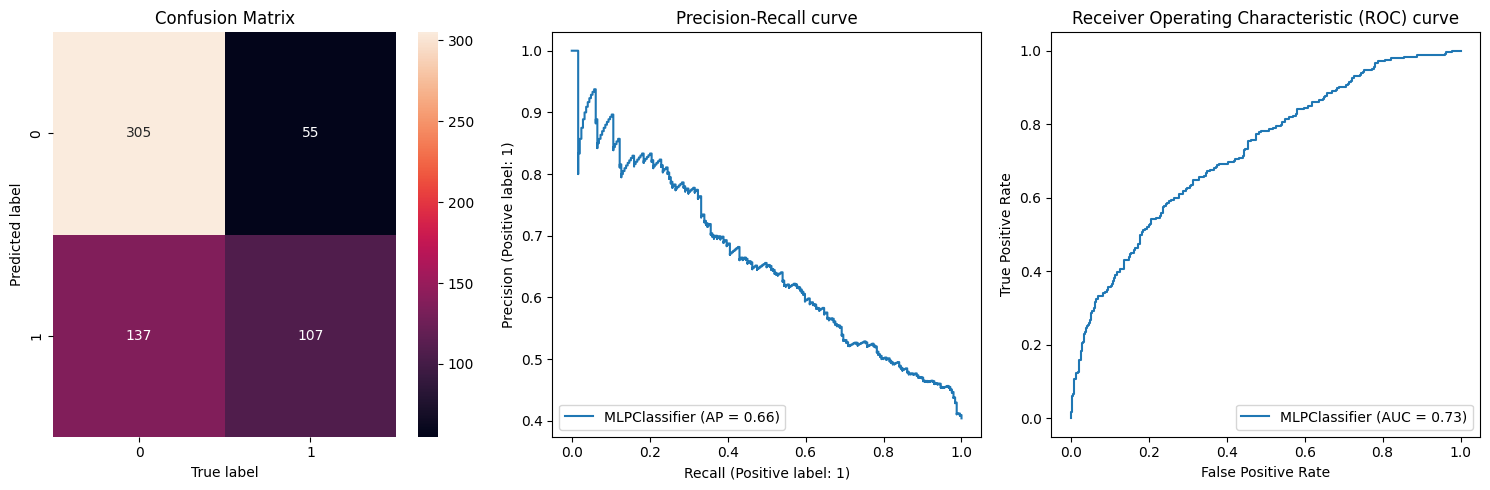

MLP Classifier with hyperparameter tuning
f1-score: 52.71%
Precision: 66.05%
Recall: 43.85%
Accuracy: 68.21%


In [162]:
# Instantiate the classifier
mlp = MLPClassifier(random_state=0)

# Define the parameters
params = {'max_iter': [100, 200, 400], 
          'hidden_layer_sizes':[50, 100, 150]}

bayes = BayesSearchCV(estimator=mlp, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

mlp_best = bayes.best_estimator_
print(mlp_best)
finalPrediction(mlp_best, "MLP Classifier with hyperparameter tuning", results_table)

MLP Classifier with upsampling using ADASYN and with hyperparameter tuning

Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=100, max_iter=400,
                               random_state=0))])


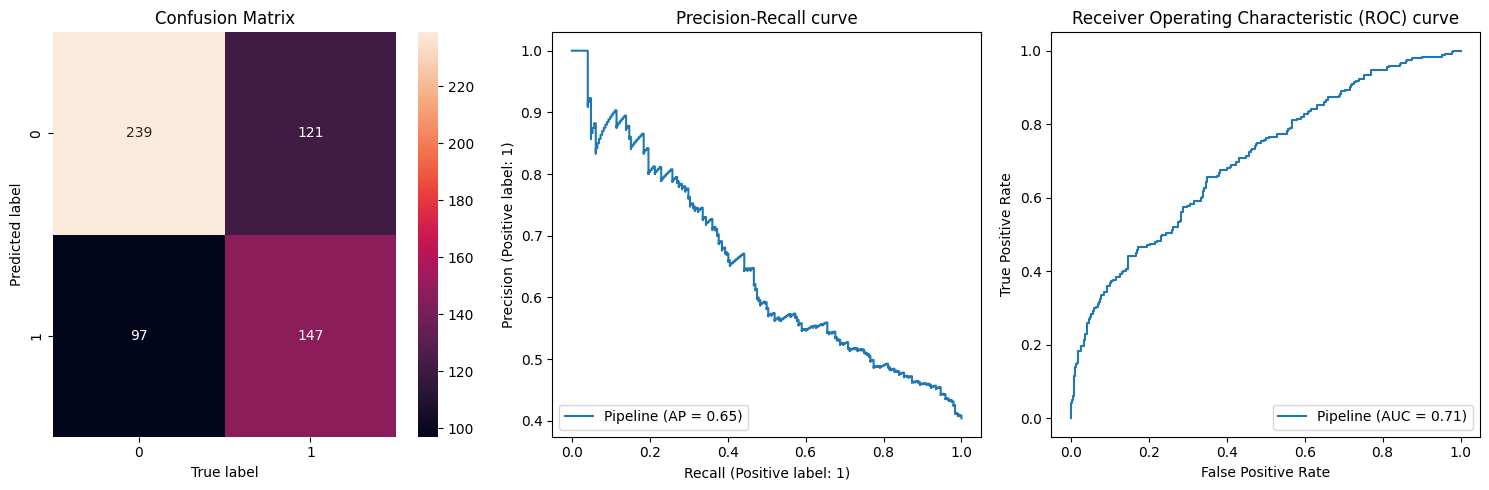

MLP Classifier with ADASYN and hyperparameter tuning
f1-score: 57.42%
Precision: 54.85%
Recall: 60.25%
Accuracy: 63.91%


In [163]:
# Instantiate the classifier
mlp = MLPClassifier(random_state=0)

# Define the parameters
params = {'mlp__max_iter': [100, 200, 400], 
          'mlp__hidden_layer_sizes':[50, 100, 150]}

adasyn = ADASYN(random_state=0)
# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('mlp',mlp)])

bayes = BayesSearchCV(pipeline, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

mlp_best_adasyn = bayes.best_estimator_
print(mlp_best_adasyn)
finalPrediction(mlp_best_adasyn, "MLP Classifier with ADASYN and hyperparameter tuning", results_table)

# Fit on train data
mlp_best_adasyn.fit(x_train, y_train) 

# Predict on test data
y_pred_mlp_ada = mlp_best_adasyn.predict(x_test)

Logistic Regression with hyperparameter tuning

LogisticRegression(C=0.10000758793870637, class_weight='balanced', max_iter=190,
                   random_state=0, solver='liblinear')


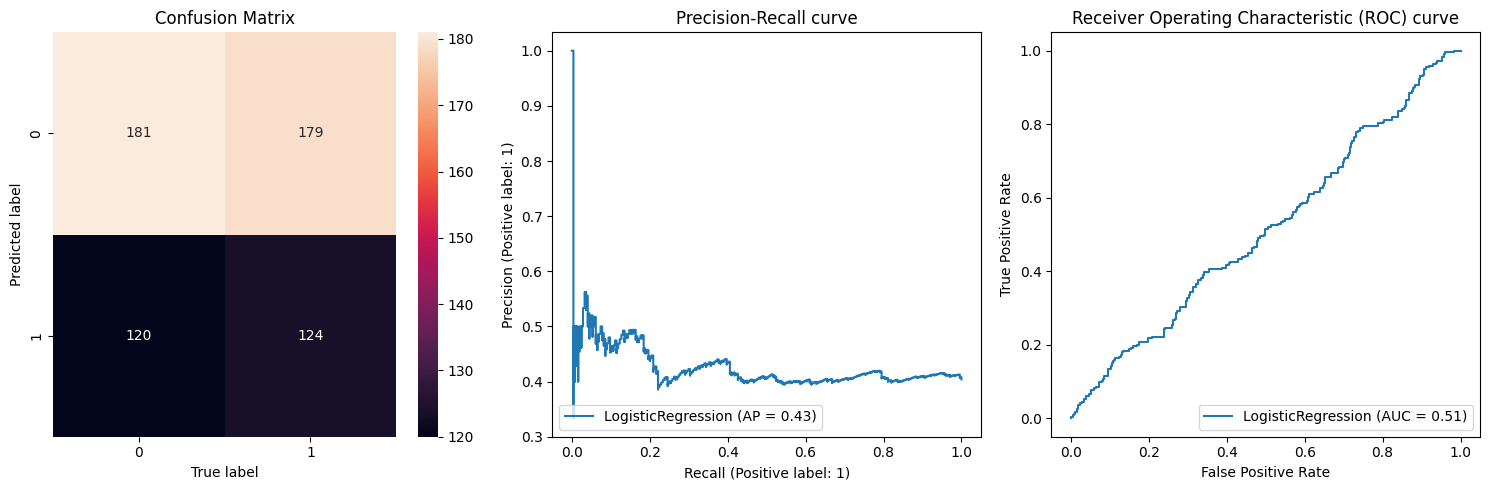

Logistic Regression Classifier with hyperparameter tuning
f1-score: 45.34%
Precision: 40.92%
Recall: 50.82%
Accuracy: 50.50%


In [164]:
# Instantiate the classifier
log_reg = LogisticRegression(random_state=0)

# Define the parameters
params = [{
    'C': [0.1, 1],
    'max_iter': [100, 300],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'class_weight': ['balanced']
   }
]

bayes = BayesSearchCV(estimator=log_reg, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

lr_best = bayes.best_estimator_
print(lr_best)
finalPrediction(lr_best, "Logistic Regression Classifier with hyperparameter tuning", results_table)

Logistic Regression with upsampling using ADASYN and with hyperparameter tuning

Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('log_reg',
                 LogisticRegression(C=0.23267783075605458, max_iter=257,
                                    random_state=0, solver='newton-cg'))])


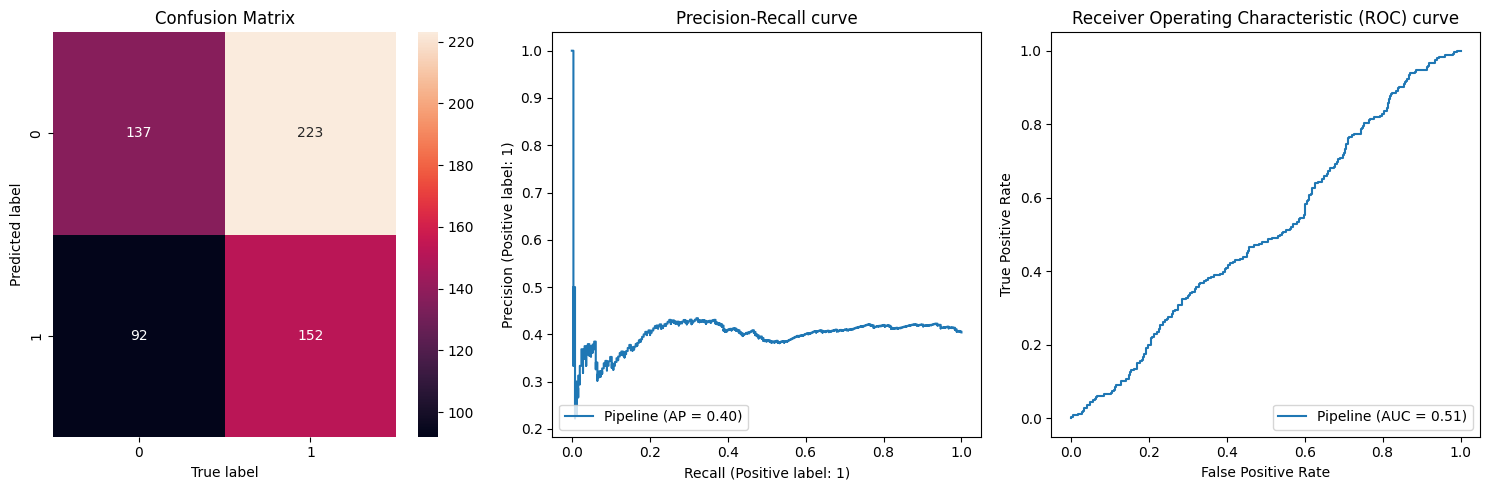

Logistic Regression Classifier with ADASYN and hyperparameter tuning
f1-score: 49.11%
Precision: 40.53%
Recall: 62.30%
Accuracy: 47.85%


In [165]:
# Instantiate the classifier
log_reg = LogisticRegression(random_state=0)
adasyn = ADASYN(random_state=0)

# Define the parameters
params = [{
    'log_reg__C': [0.1, 1],
    'log_reg__max_iter': [100, 300],
    'log_reg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
   }
]

# Include the sequence in a pipeline to avoid overfitting & data leakage while cross validation is being performed
pipeline = Pipeline([('adasyn',adasyn),('log_reg',log_reg)])

bayes = BayesSearchCV(pipeline, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

lr_best_adasyn = bayes.best_estimator_
print(lr_best_adasyn)
finalPrediction(lr_best_adasyn, "Logistic Regression Classifier with ADASYN and hyperparameter tuning", results_table)

Random Forest with Hyperparameter tuning

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=15,
                       random_state=0)


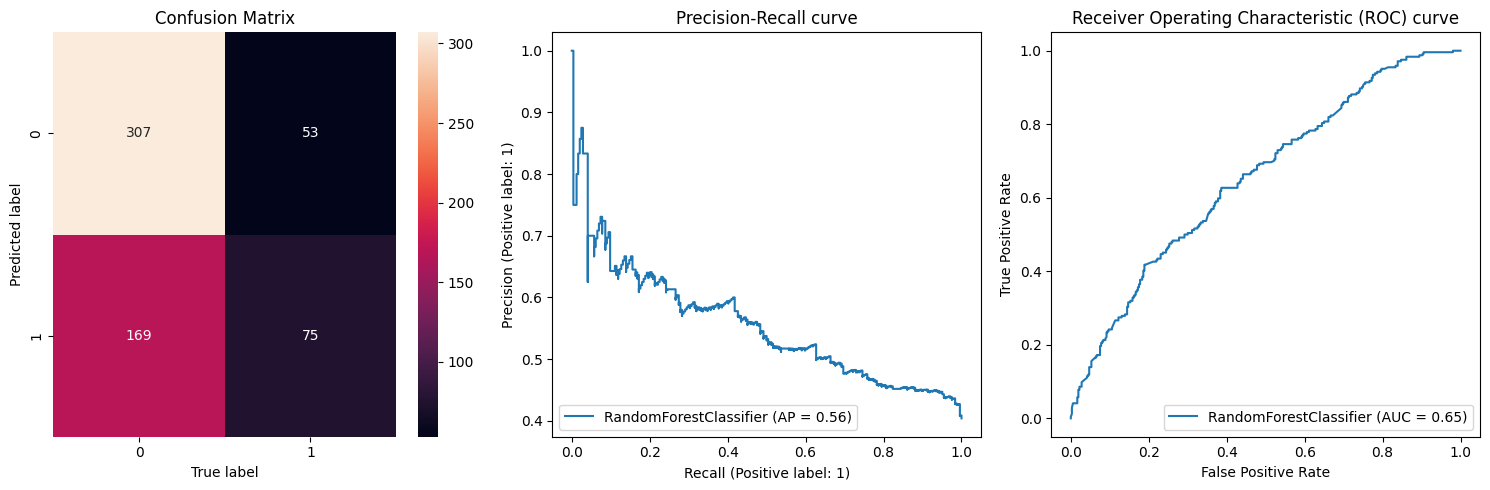

Random Forest Classifier with hyperparameter tuning
f1-score: 40.32%
Precision: 58.59%
Recall: 30.74%
Accuracy: 63.25%


In [166]:
# Instantiate the classifier
randomForest = RandomForestClassifier(random_state=0)

# Define the parameters
params = {
    'n_estimators': [15, 20, 25],
    'max_depth': [20, 25],
    'criterion':['gini', 'entropy']
}

bayes = BayesSearchCV(estimator=randomForest, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

rf_best = bayes.best_estimator_
print(rf_best)
finalPrediction(rf_best, "Random Forest Classifier with hyperparameter tuning", results_table)

Random Forest with ADASYN and Hyperparameter tuning

Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('randomForest',
                 RandomForestClassifier(max_depth=20, n_estimators=25,
                                        random_state=0))])


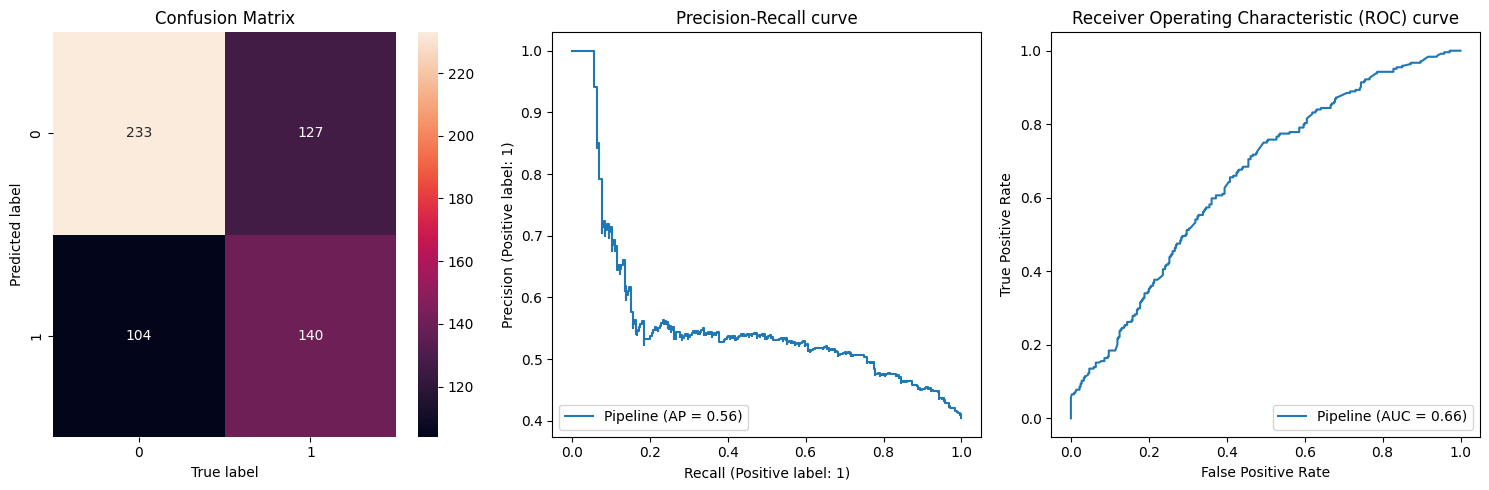

Random Forest Classifier with ADASYN and hyperparameter tuning
f1-score: 54.79%
Precision: 52.43%
Recall: 57.38%
Accuracy: 61.75%


In [167]:
# Instantiate the classifier
randomForest = RandomForestClassifier(random_state=0)
adasyn = ADASYN(random_state=0)

# Define the parameters
params = {
    'randomForest__n_estimators': [15, 20, 25],
    'randomForest__max_depth' : [20, 25],
    'randomForest__criterion':['gini', 'entropy']
}

# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('randomForest',randomForest)])

bayes = BayesSearchCV(pipeline, 
                      search_spaces=params, 
                      n_iter=50, 
                      cv=5, 
                      n_jobs=-1, 
                      scoring="f1", 
                      random_state=0)
bayes.fit(x_val, y_val)

rf_best_adasyn = bayes.best_estimator_
print(rf_best_adasyn)
finalPrediction(rf_best_adasyn, "Random Forest Classifier with ADASYN and hyperparameter tuning", results_table)

# Fit on train data
rf_best_adasyn.fit(x_train, y_train) 

# Predict on test data
y_pred_rf_ada = rf_best_adasyn.predict(x_test)

In [168]:
print(results_table)
# Tabulate and display and format the classifier results
baselearners_df = pd.DataFrame(results_table, 
                               columns = ["Classifier","F1-score","Precision","Recall","Accuracy"])
with pd.option_context('display.precision', 2):
    formatted_table=(baselearners_df.style.background_gradient(cmap ='Blues'))
formatted_table

[['Decision Tree classifier with hyperparameter tuning', 20.27972027972028, 69.04761904761905, 11.885245901639344, 62.251655629139066], ['Decision Tree Classifier with ADASYN and hyperparameter tuning', 57.54716981132076, 40.397350993377486, 100.0, 40.397350993377486], ['Naive Bayes Gaussian classifier with hyperparameter tuning', 34.705882352941174, 61.458333333333336, 24.18032786885246, 63.24503311258278], ['Naive Bayes Gaussian Classifier with ADASYN and hyperparameter tuning', 34.705882352941174, 61.458333333333336, 24.18032786885246, 63.24503311258278], ['K Nearest Neighbors Classifier with hyperparameter tuning', 44.10480349344978, 47.19626168224299, 41.39344262295082, 57.615894039735096], ['K Nearest Neighbors Classifier with ADASYN and hyperparameter tuning', 54.61254612546126, 49.664429530201346, 60.65573770491803, 59.27152317880795], ['SVM Classifier with hyperparameter tuning', 45.86206896551724, 39.58333333333333, 54.50819672131148, 48.01324503311258], ['SVM Classifier with

In [169]:
# Sort to check the highest performing models
sorted_df = baselearners_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
sorted_df

Classifier   F1-score  Precision  \
0   Decision Tree Classifier with ADASYN and hyper...  57.547170  40.397351   
1   MLP Classifier with ADASYN and hyperparameter ...  57.421875  54.850746   
2   SVM Classifier with ADASYN and hyperparameter ...  55.089820  43.396226   
3   Random Forest Classifier with ADASYN and hyper...  54.794521  52.434457   
4   K Nearest Neighbors Classifier with ADASYN and...  54.612546  49.664430   
5           MLP Classifier with hyperparameter tuning  52.709360  66.049383   
6   Logistic Regression Classifier with ADASYN and...  49.111470  40.533333   
7           SVM Classifier with hyperparameter tuning  45.862069  39.583333   
8   Logistic Regression Classifier with hyperparam...  45.338208  40.924092   
9   K Nearest Neighbors Classifier with hyperparam...  44.104803  47.196262   
10  Random Forest Classifier with hyperparameter t...  40.322581  58.593750   
11  Naive Bayes Gaussian classifier with hyperpara...  34.705882  61.458333   
12  Naive Bayes Gaussian Classifier with ADASYN an...  34.705882  61.458333   
13  Decision Tree classifier with hyperparameter t...  20.279720  69.047619   

        Recall   Accuracy  
0   100.000000  40.397351  
1    60.245902  63.907285  
2    75.409836  50.331126  
3    57.377049  61.754967  
4    60.655738  59.271523  
5    43.852459  68.211921  
6    62.295082  47.847682  
7    54.508197  48.013245  
8    50.819672  50.496689  
9    41.393443  57.615894  
10   30.737705  63.245033  
11   24.180328  63.245033  
12   24.180328  63.245033  
13   11.885246  62.251656

In [170]:
sorted_df = sorted_df.iloc[[0,1,2,3,4]]
sorted_df_table=(sorted_df.style.background_gradient(cmap ='Blues'))
sorted_df_table

Stacking ensemble with baselearner models that obtained high F1-scores

In [171]:
# Compile the list of estimates that obtained high F1-scores
ensemble_estimators = [rf_best_adasyn, 
                       knn_best_adasyn, 
                       svm_best_adasyn, 
                       dt_best_adasyn, 
                       mlp_best_adasyn]
ensemble_estimators = {str(model)+"_pipeline" : estimator for estimator, 
                       model in zip(ensemble_estimators,["rf","knn","svc","dt", "mlp"])}
print(ensemble_estimators)

{'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('randomForest',
                 RandomForestClassifier(max_depth=20, n_estimators=25,
                                        random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=7))]), 'svc_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svc',
                 SVC(C=0.1, gamma=0.906555356072811, max_iter=293,
                     probability=True, random_state=0))]), 'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('dt',
                 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=9,
                                        min_samples_leaf=3, min_samples_split=8,
                                        splitter='random'))]), 'mlp_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('mlp',
                 MLPC

In [172]:
# For tabulating results
ensemble_results_table = []

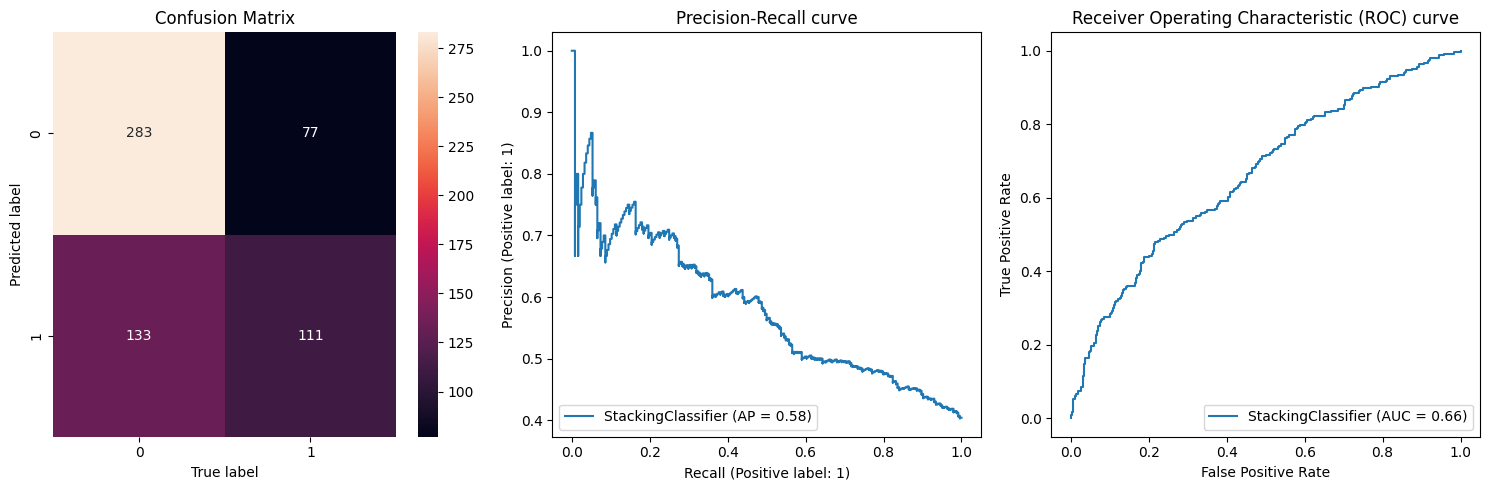

Stacking with XGBoost Classifier
f1-score: 51.39%
Precision: 59.04%
Recall: 45.49%
Accuracy: 65.23%


In [173]:
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=0)], ["XGBoost"]):
  stacking = StackingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], model)
  ensemble_results = finalPrediction(stacking, "Stacking with XGBoost Classifier", ensemble_results_table)

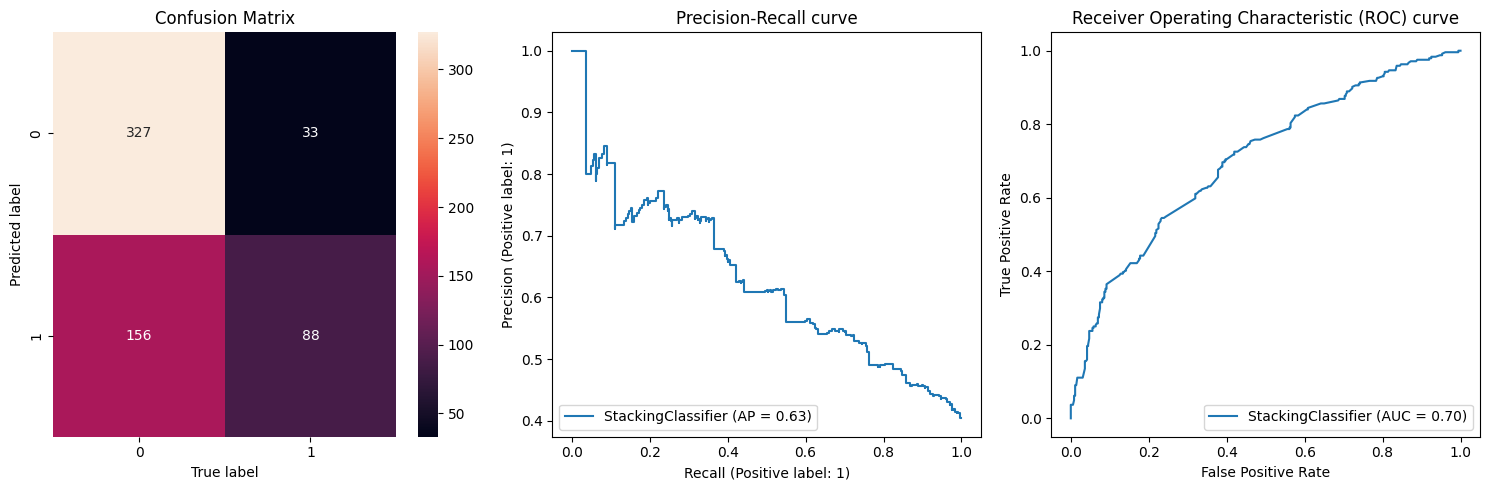

Stacking with AdaBoost Classifier
f1-score: 48.22%
Precision: 72.73%
Recall: 36.07%
Accuracy: 68.71%


In [174]:
for model,model_name in zip([AdaBoostClassifier(random_state = 0)],["AdaBoost"]):
  stacking = StackingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], model)
  ensemble_results = finalPrediction(stacking, "Stacking with AdaBoost Classifier", ensemble_results_table)

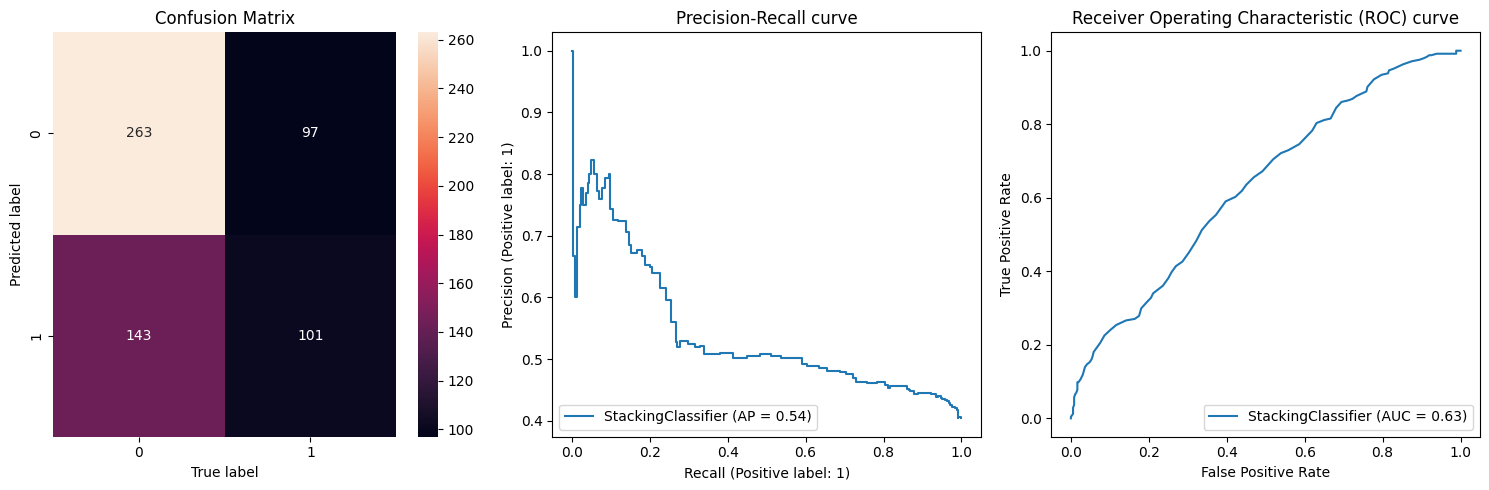

Stacking with Random Forest Classifier
f1-score: 45.70%
Precision: 51.01%
Recall: 41.39%
Accuracy: 60.26%


In [175]:
for model,model_name in zip([RandomForestClassifier(random_state=0)],["Random_Forest"]):
  stacking = StackingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], model)
  ensemble_results = finalPrediction(stacking, "Stacking with Random Forest Classifier", ensemble_results_table)

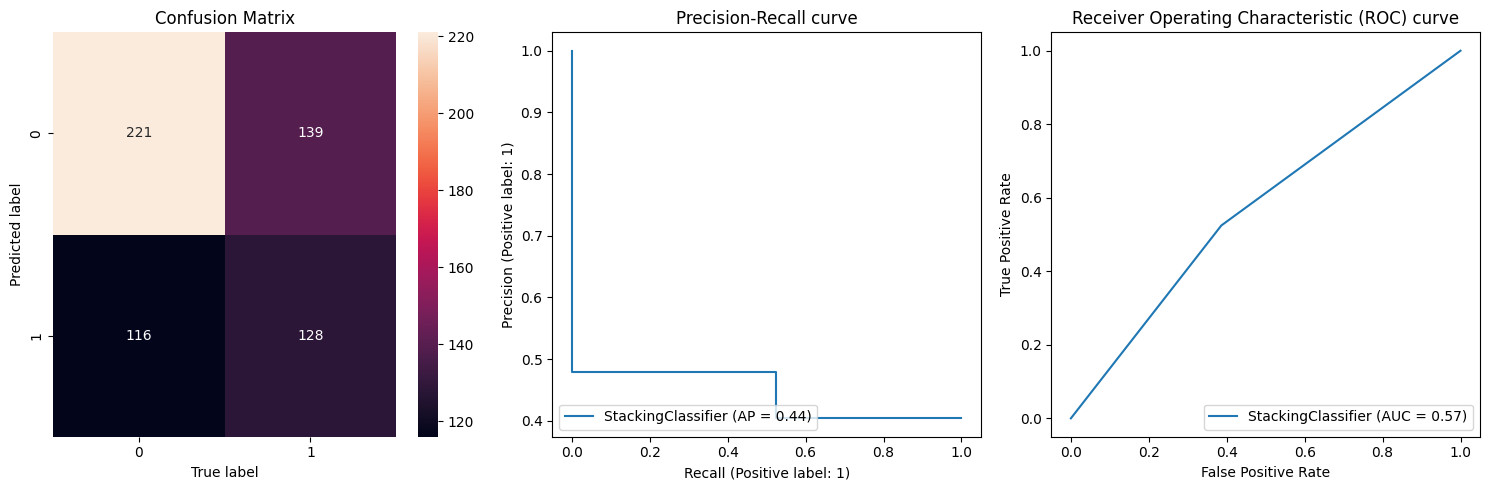

Stacking with Decision Tree Classifier
f1-score: 50.10%
Precision: 47.94%
Recall: 52.46%
Accuracy: 57.78%


In [176]:
for model,model_name in zip([DecisionTreeClassifier(random_state = 0)],["Decision_Tree"]):
  stacking = StackingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], model)
  ensemble_results = finalPrediction(stacking, "Stacking with Decision Tree Classifier", ensemble_results_table)

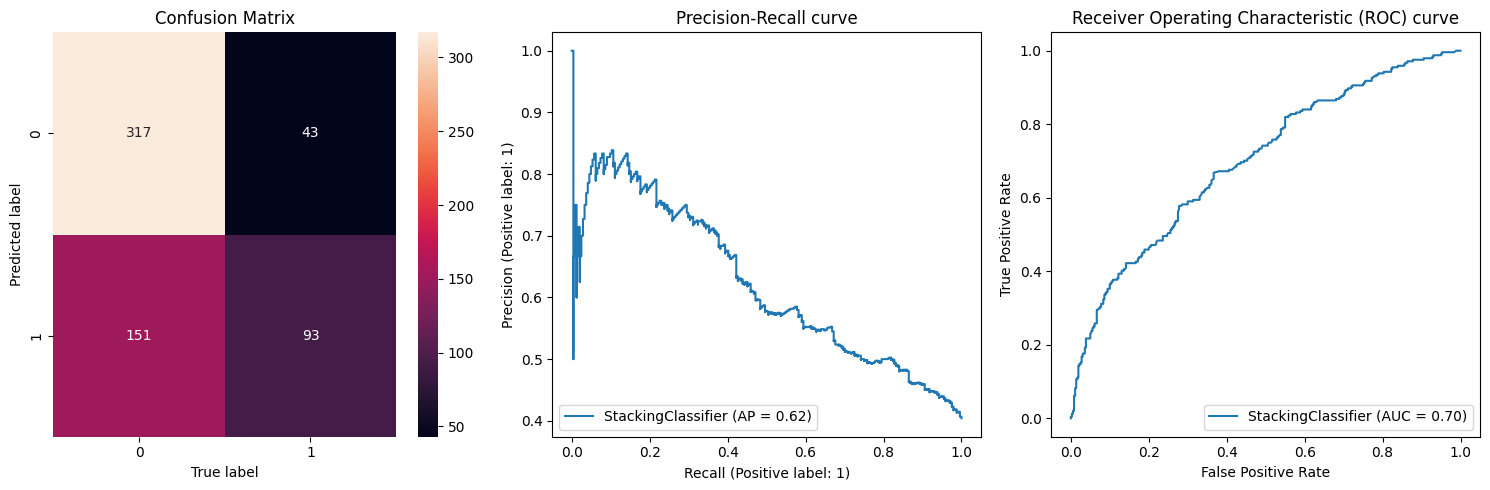

Stacking with Gradient Boosting Classifier
f1-score: 48.95%
Precision: 68.38%
Recall: 38.11%
Accuracy: 67.88%


In [177]:
for model,model_name in zip([GradientBoostingClassifier(random_state = 0)],["Gradient_Boosting"]):
  stacking = StackingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], model)
  ensemble_results = finalPrediction(stacking, "Stacking with Gradient Boosting Classifier", ensemble_results_table)

Implementing Voting ensemble on the selected five base classifiers

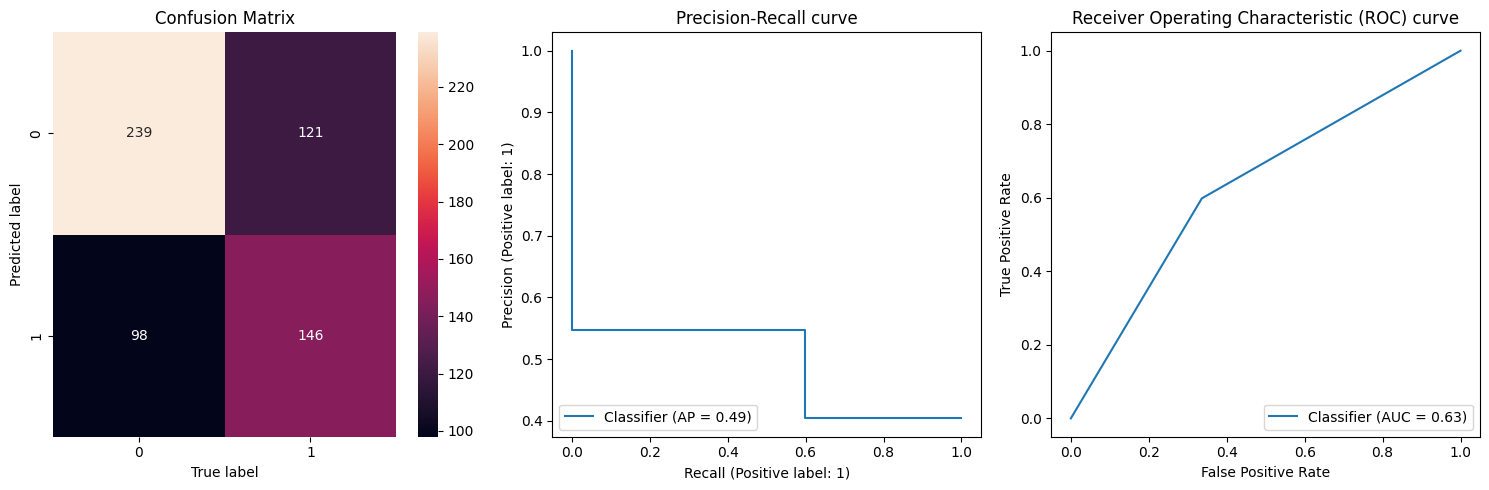

Voting-Hard
f1-score: 57.14%
Precision: 54.68%
Recall: 59.84%
Accuracy: 63.74%


In [178]:
voting_classifier_hard = VotingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], voting='hard')
ensemble_results = finalPrediction(voting_classifier_hard, "Voting-Hard", ensemble_results_table, all_charts=False)

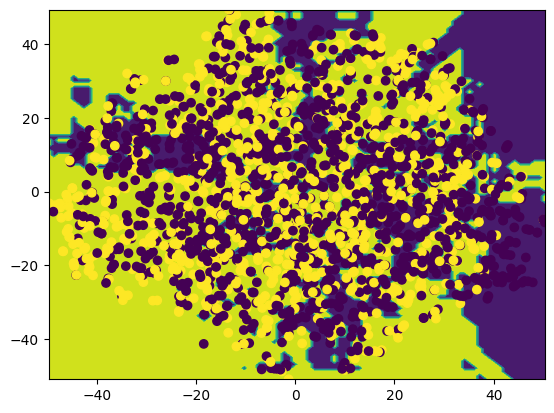

In [179]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold._t_sne import TSNE
from sklearn.base import clone

# Plotting decision regions
X_Train_embedded = TSNE(n_components=2).fit_transform(x_train)

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = voting_classifier_hard.fit(X_Train_embedded, y_train) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y_train)
plt.savefig('scatter.svg', format='svg')
plt.show()

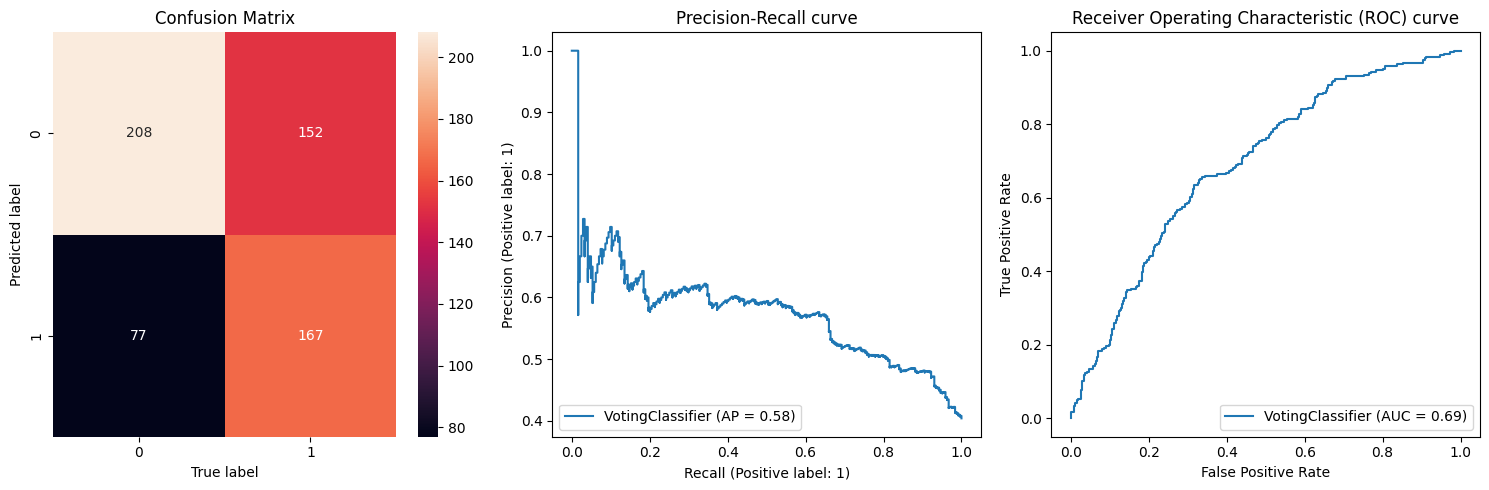

Voting-Soft
f1-score: 59.33%
Precision: 52.35%
Recall: 68.44%
Accuracy: 62.09%


In [180]:
voting_classifier_soft = VotingClassifier([(estName, clone(est)) for estName, est in ensemble_estimators.items()], voting='soft')
ensemble_results = finalPrediction(voting_classifier_soft, "Voting-Soft", ensemble_results_table)

# Fit on train data
voting_classifier_soft.fit(x_train, y_train) 

# Predict on test data
y_pred_voting_soft = voting_classifier_soft.predict(x_test)

In [181]:
#Tabulating the obtained results and displaying the results by formatting
ensemble_df = pd.DataFrame(ensemble_results_table, columns = ["Classifier","F1-score","Precision","Recall","Accuracy"])
ensemble_df = ensemble_df.sort_values(by='F1-score', ascending=False)
with pd.option_context('display.precision', 4):
    ensemble_table=(ensemble_df.style.background_gradient(cmap ='Blues'))
ensemble_table

In [182]:
Full_results = pd.concat([sorted_df, ensemble_df], ignore_index=True)
Full_results = Full_results.sort_values(by='F1-score', ascending=False)
Full_results=(Full_results.style.background_gradient(cmap ='Blues'))
Full_results

### Manual Metric Definitions

In [183]:
# Manually define metrics for when there are no built-in functions

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Early Stopping

In [184]:
#early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True, verbose=1)
early_stopping = EarlyStopping(
    monitor='val_f1_m', 
    mode='max', 
    patience=20, 
    restore_best_weights=True, 
    verbose=1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5, 
    verbose=1
)

### CNN with hyperparameter tuning

In [84]:
# Assuming x_train is a numpy array of shape (num_samples, 9)
# Reshape x_train into a 4D tensor with dimensions (num_samples, 3, 3, 1)
tmp = np.array(x_train)
x_train_reshape = tmp.reshape((x_train.shape[0], 3, 3, 1))
tmp2 = np.array(x_val)
x_val_reshape = tmp2.reshape((x_val.shape[0], 3, 3, 1))

# Define the input shape
CNN_input_shape = (3, 3, 1)

# Define model
def create_cnn_model(num_filters_1=32, num_filters_2=40, rate=0.1, num_dense_units=32):
  model = keras.Sequential([
    layers.Conv2D(filters=num_filters_1, kernel_size=2, input_shape=CNN_input_shape, activation='relu'),
    layers.Conv2D(filters=num_filters_2, kernel_size=3, padding="same", activation='relu'),
    layers.Dropout(rate=rate),
    layers.Flatten(),

    # Hidden layer
    layers.Dense(units=num_dense_units, activation='relu'),
    layers.Dropout(rate=rate),
    # Output layer
    layers.Dense(units=1, activation='sigmoid')
  ])

  # Define optimizer, loss function and accuracy metric
  model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', f1_m])
        
  return model

# compile model using categorical crossentropy loss function
cnn = KerasClassifier(build_fn=create_cnn_model,
                        epochs=50,
                        batch_size=8,
                        num_filters_1=32,
                        num_filters_2=1,
                        rate=0.1,
                        num_dense_units=32
                      )

# define the grid search parameters
param_grid = {
    'num_filters_1': [72, 90],
    'num_filters_2': [36, 72],
    'rate': [0.05, 0.1],
    'num_dense_units': [36, 72],
}

# create a GridSearchCV object and fit it to the data
grid_cnn = GridSearchCV(estimator=cnn,
                    param_grid=param_grid,
                    verbose=1,
                    cv=3,
                    scoring=f1_m)

cnn_grid_result = grid_cnn.fit(x_train_reshape, y_train,
                    validation_data=(x_val_reshape, y_val))

# print out the best hyperparameters
print(f'Best hyperparameters: {cnn_grid_result.best_params_}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/50
178/178 [==============================] - 3s 6ms/step - loss: 0.6703 - accuracy: 0.6159 - f1_m: 0.1789 - val_loss: 0.6550 - val_accuracy: 0.6318 - val_f1_m: 0.1942
Epoch 2/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6367 - accuracy: 0.6489 - f1_m: 0.2567 - val_loss: 0.6339 - val_accuracy: 0.6486 - val_f1_m: 0.3042
Epoch 3/50
178/178 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.6601 - f1_m: 0.3695 - val_loss: 0.6441 - val_accuracy: 0.6374 - val_f1_m: 0.3436
Epoch 4/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6090 - accuracy: 0.6671 - f1_m: 0.4046 - val_loss: 0.6358 - val_accuracy: 0.6561 - val_f1_m: 0.3155
Epoch 5/50
178/178 [==============================] - 1s 3ms/step - loss: 0.5941 - accuracy: 0.6819 - f1_m: 0.4244 - val_loss: 0.6548 - val_accuracy: 0.6187 - val_f1_m: 0.4995
Epoch 6/50
178/178 [==============================] - 1s 3m

Epoch 1/100
67/67 [==============================] - 2s 8ms/step - loss: 0.6687 - accuracy: 0.6196 - f1_m: 0.0796 - val_loss: 0.6620 - val_accuracy: 0.6150 - val_f1_m: 0.1700 - lr: 0.0010
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.6589 - f1_m: 0.3325 - val_loss: 0.6420 - val_accuracy: 0.6598 - val_f1_m: 0.4706 - lr: 0.0010
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 0.6114 - accuracy: 0.6762 - f1_m: 0.4468 - val_loss: 0.6312 - val_accuracy: 0.6486 - val_f1_m: 0.4754 - lr: 0.0010
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6001 - accuracy: 0.6776 - f1_m: 0.4580 - val_loss: 0.6259 - val_accuracy: 0.6598 - val_f1_m: 0.4431 - lr: 0.0010
Epoch 5/100
67/67 [==============================] - 0s 6ms/step - loss: 0.5882 - accuracy: 0.6926 - f1_m: 0.4798 - val_loss: 0.6327 - val_accuracy: 0.6579 - val_f1_m: 0.3848 - lr: 0.0010
Epoch 6/100
67/67 [==============================] - 0s 5ms/

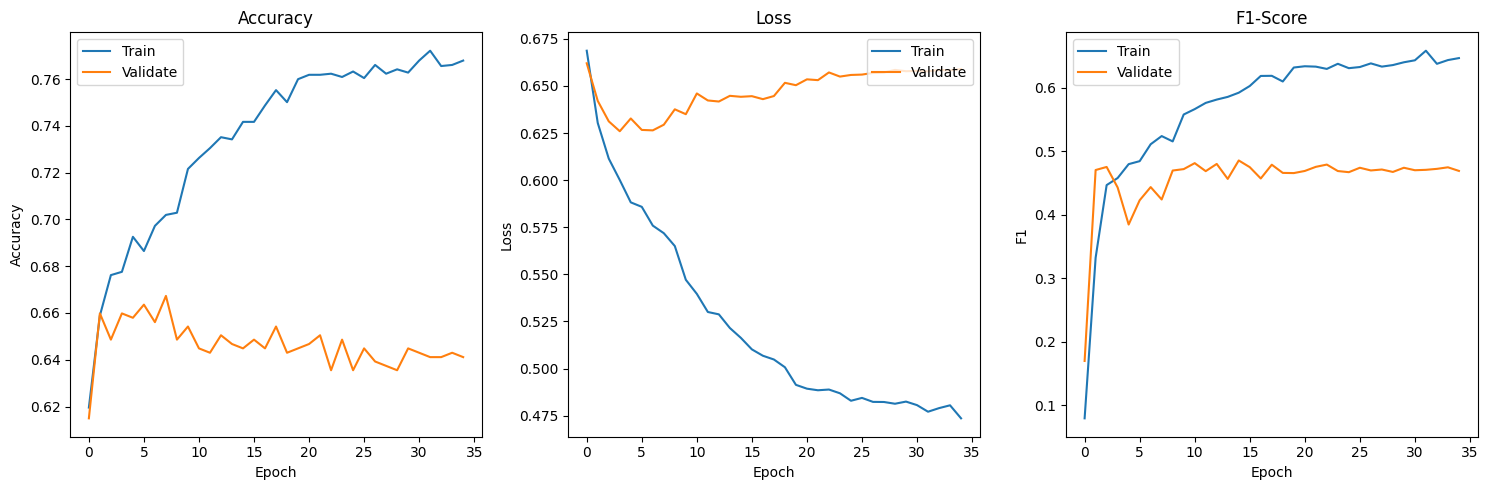

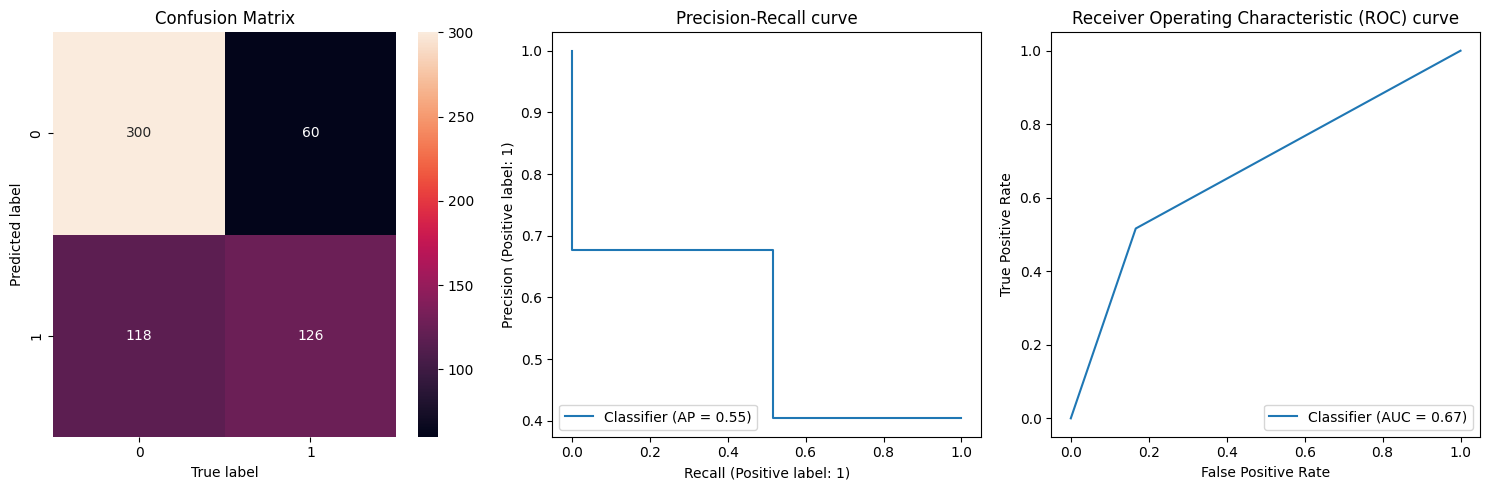

CNN with hyperparameter tuning
f1-score: 58.60%
Precision: 67.74%
Recall: 51.64%
Accuracy: 70.53%


In [185]:
# Reshape the test data
tmp3 = np.array(x_test)
x_test_reshape = tmp3.reshape((x_test.shape[0], 3, 3, 1))

# Create a new model with the best parameters
best_cnn = create_cnn_model(num_filters_1=cnn_grid_result.best_params_['num_filters_1'],
                         num_filters_2=cnn_grid_result.best_params_['num_filters_2'],
                         rate=cnn_grid_result.best_params_['rate'],
                         num_dense_units=cnn_grid_result.best_params_['num_dense_units'])

# Fit the best DNN and store history
best_cnn_history = best_cnn.fit(x_train_reshape, y_train,
             validation_data=(x_val_reshape, y_val),
             epochs=100,
             callbacks=[early_stopping, reduce_lr],
             verbose=1)

# Make predictions on the validation data
y_pred_cnn = best_cnn.predict(x_test_reshape)
y_pred_cnn_binary = (y_pred_cnn > 0.5).astype(int)

# Tabulate results
cnn_results = print_metrics(best_cnn, y_pred_cnn_binary, "CNN with hyperparameter tuning", best_cnn_history.history, results_table)
results_table.append(cnn_results)

CNN with ADASYN

In [86]:
# Applying upsampling using ADASYN for the training data due to imbalance in data
ada = ADASYN(random_state=0)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)
# Define the input shape
CNN_input_shape = (3, 3, 1)

tmp = np.array(x_train_ada)
# Assuming x_train is a numpy array of shape (num_samples, 9)
# Reshape x_train into a 4D tensor with dimensions (num_samples, 3, 3, 1)
x_train_reshape_ada = tmp.reshape((x_train_ada.shape[0], 3, 3, 1))
tmp2 = np.array(x_val)
x_val_reshape_ada = tmp2.reshape((x_val.shape[0], 3, 3, 1))

cnn_grid_result_ada = grid_cnn.fit(x_train_reshape_ada, y_train_ada,
                    validation_data=(x_val_reshape_ada , y_val))

# print out the best score and hyperparameters
print(f'Best hyperparameters: {cnn_grid_result_ada.best_params_}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/50
223/223 [==============================] - 3s 6ms/step - loss: 0.6908 - accuracy: 0.5228 - f1_m: 0.5478 - val_loss: 0.6872 - val_accuracy: 0.5551 - val_f1_m: 0.4996
Epoch 2/50
223/223 [==============================] - 1s 5ms/step - loss: 0.6638 - accuracy: 0.5830 - f1_m: 0.5677 - val_loss: 0.6776 - val_accuracy: 0.5514 - val_f1_m: 0.5556
Epoch 3/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6464 - accuracy: 0.6224 - f1_m: 0.6088 - val_loss: 0.6598 - val_accuracy: 0.5981 - val_f1_m: 0.5249
Epoch 4/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6390 - accuracy: 0.6246 - f1_m: 0.6314 - val_loss: 0.6766 - val_accuracy: 0.5720 - val_f1_m: 0.5405
Epoch 5/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6223 - accuracy: 0.6500 - f1_m: 0.6427 - val_loss: 0.6618 - val_accuracy: 0.5925 - val_f1_m: 0.5375
Epoch 6/50
223/223 [==============================] - 1s 3m

Epoch 1/100
84/84 [==============================] - 2s 9ms/step - loss: 0.6806 - accuracy: 0.5499 - f1_m: 0.5744 - val_loss: 0.7064 - val_accuracy: 0.4879 - val_f1_m: 0.5672 - lr: 0.0010
Epoch 2/100
84/84 [==============================] - 1s 6ms/step - loss: 0.6482 - accuracy: 0.6185 - f1_m: 0.6270 - val_loss: 0.6488 - val_accuracy: 0.6131 - val_f1_m: 0.4984 - lr: 0.0010
Epoch 3/100
84/84 [==============================] - 0s 6ms/step - loss: 0.6299 - accuracy: 0.6350 - f1_m: 0.6354 - val_loss: 0.6306 - val_accuracy: 0.6393 - val_f1_m: 0.4696 - lr: 0.0010
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.6298 - accuracy: 0.6407 - f1_m: 0.6460 - val_loss: 0.6507 - val_accuracy: 0.6037 - val_f1_m: 0.5259 - lr: 0.0010
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.6124 - accuracy: 0.6538 - f1_m: 0.6452 - val_loss: 0.6647 - val_accuracy: 0.5963 - val_f1_m: 0.5349 - lr: 0.0010
Epoch 6/100
84/84 [==============================] - 0s 5ms/

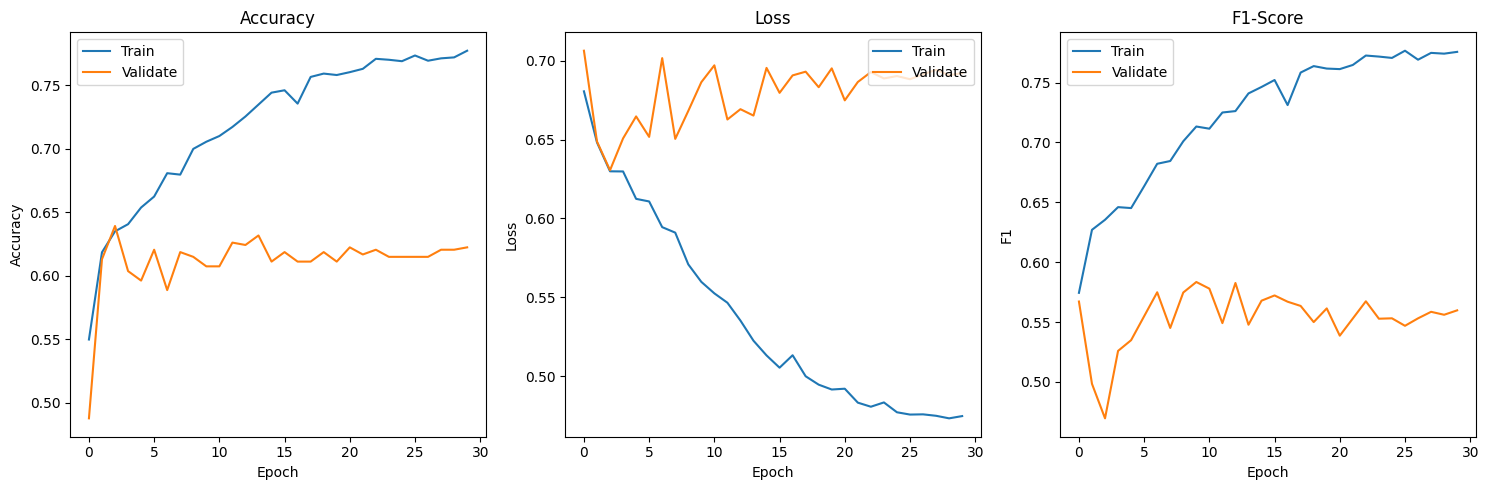

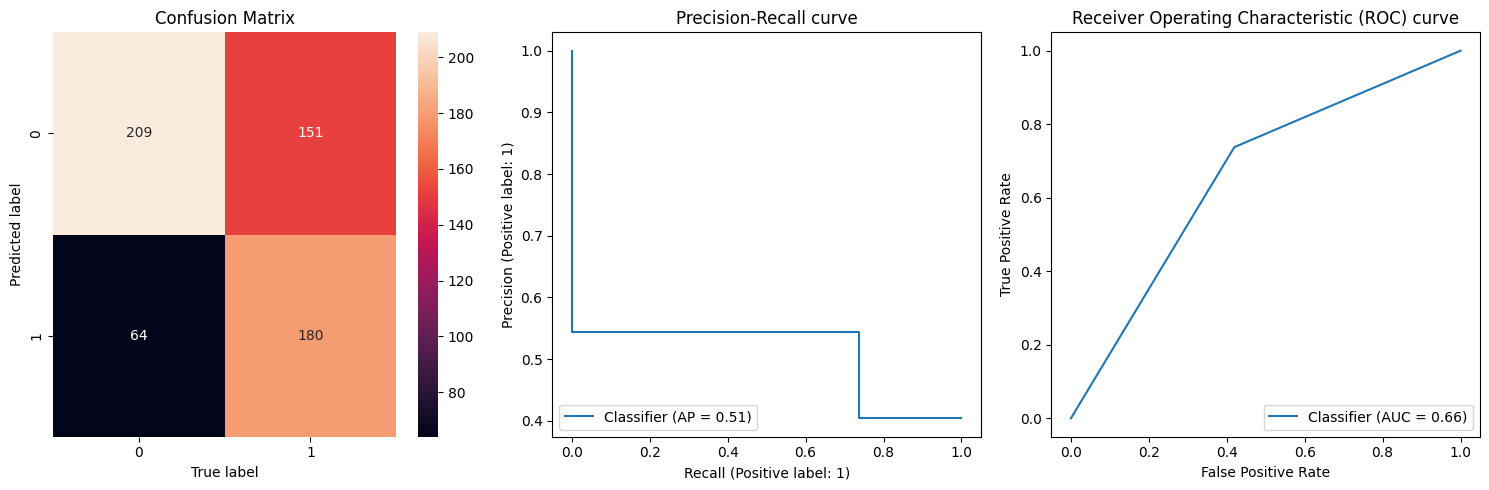

CNN with ADASYN and hyperparameter tuning
f1-score: 62.61%
Precision: 54.38%
Recall: 73.77%
Accuracy: 64.40%


In [186]:
# Create a new model with the best parameters
best_cnn_ada = create_cnn_model(num_filters_1=cnn_grid_result_ada.best_params_['num_filters_1'],
                         num_filters_2=cnn_grid_result_ada.best_params_['num_filters_2'],
                         rate=cnn_grid_result_ada.best_params_['rate'],
                         num_dense_units=cnn_grid_result_ada.best_params_['num_dense_units'])

best_cnn_ada_history = best_cnn_ada.fit(x_train_reshape_ada, y_train_ada,
             validation_data=(x_val_reshape_ada, y_val),
             epochs=100,
             callbacks=[early_stopping, reduce_lr],
             verbose=1)

# Make predictions
y_pred_cnn_ada = best_cnn_ada.predict(x_test_reshape)
y_pred_cnn_ada_binary = (y_pred_cnn_ada > 0.5).astype(int)

# Tabulate results
cnn_results_ada = print_metrics(best_cnn_ada, y_pred_cnn_ada_binary, "CNN with ADASYN and hyperparameter tuning", best_cnn_ada_history.history, results_table)
results_table.append(cnn_results_ada)


### RNN with hyperparameter tuning

In [91]:
RNN_input_shape = (9, 1)

# Define model
def create_rnn_model(num_units_1=4, num_units_2=2):
  model = keras.Sequential([
    # Conv Layer 1
    layers.SimpleRNN(units=num_units_1, input_shape=RNN_input_shape, activation='relu', return_sequences=True),
    layers.SimpleRNN(units=num_units_2, activation='relu'),

    # Output layer
    layers.Dense(units=1, activation='sigmoid')
  ])
  # Define optimizer, loss function and accuracy metric
  model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', f1_m])
        
  return model

# compile model using categorical crossentropy loss function
rnn = KerasClassifier(build_fn=create_rnn_model,
                        epochs=50,
                        batch_size=8,
                        num_units_1=4,
                        num_units_2=1,
                      )

# define the grid search parameters
param_grid = {
    'num_units_1': [36, 72],
    'num_units_2': [9, 18],
}

# create a GridSearchCV object and fit it to the data
grid_rnn = GridSearchCV(estimator=rnn,
                    param_grid=param_grid,
                    verbose=1,
                    cv=3,
                    scoring=f1_m)

rnn_grid_result = grid_rnn.fit(x_train, y_train,
                    validation_data=(x_val, y_val))

# print out the best hyperparameters
print(f'Best hyperparameters: {rnn_grid_result.best_params_}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/50
178/178 [==============================] - 3s 10ms/step - loss: 0.6816 - accuracy: 0.5836 - f1_m: 0.0942 - val_loss: 0.6718 - val_accuracy: 0.6131 - val_f1_m: 0.0060
Epoch 2/50
178/178 [==============================] - 1s 6ms/step - loss: 0.6692 - accuracy: 0.6103 - f1_m: 0.0000e+00 - val_loss: 0.6722 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00
Epoch 3/50
178/178 [==============================] - 1s 6ms/step - loss: 0.6656 - accuracy: 0.6103 - f1_m: 0.0022 - val_loss: 0.6727 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00
Epoch 4/50
178/178 [==============================] - 1s 5ms/step - loss: 0.6633 - accuracy: 0.6103 - f1_m: 0.0185 - val_loss: 0.6733 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00
Epoch 5/50
178/178 [==============================] - 1s 6ms/step - loss: 0.6574 - accuracy: 0.6081 - f1_m: 0.0447 - val_loss: 0.6817 - val_accuracy: 0.5626 - val_f1_m: 0.2648
Epoch 6/50
178/178 [=======================

Epoch 1/100
67/67 [==============================] - 3s 15ms/step - loss: 0.6854 - accuracy: 0.5700 - f1_m: 0.1479 - val_loss: 0.6739 - val_accuracy: 0.6112 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 2/100
67/67 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.6130 - f1_m: 0.0000e+00 - val_loss: 0.6714 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 3/100
67/67 [==============================] - 1s 8ms/step - loss: 0.6684 - accuracy: 0.6121 - f1_m: 0.0023 - val_loss: 0.6710 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 4/100
67/67 [==============================] - 1s 8ms/step - loss: 0.6652 - accuracy: 0.6125 - f1_m: 0.0000e+00 - val_loss: 0.6721 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 5/100
67/67 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.6149 - f1_m: 0.0090 - val_loss: 0.6728 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 6/100
67/67 [============

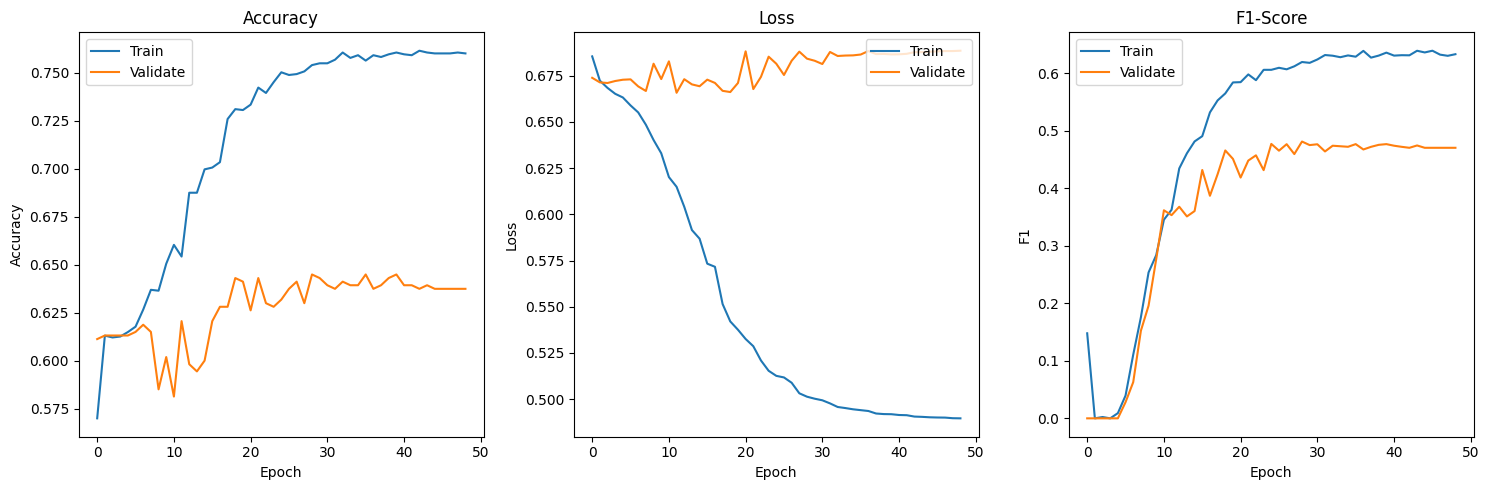

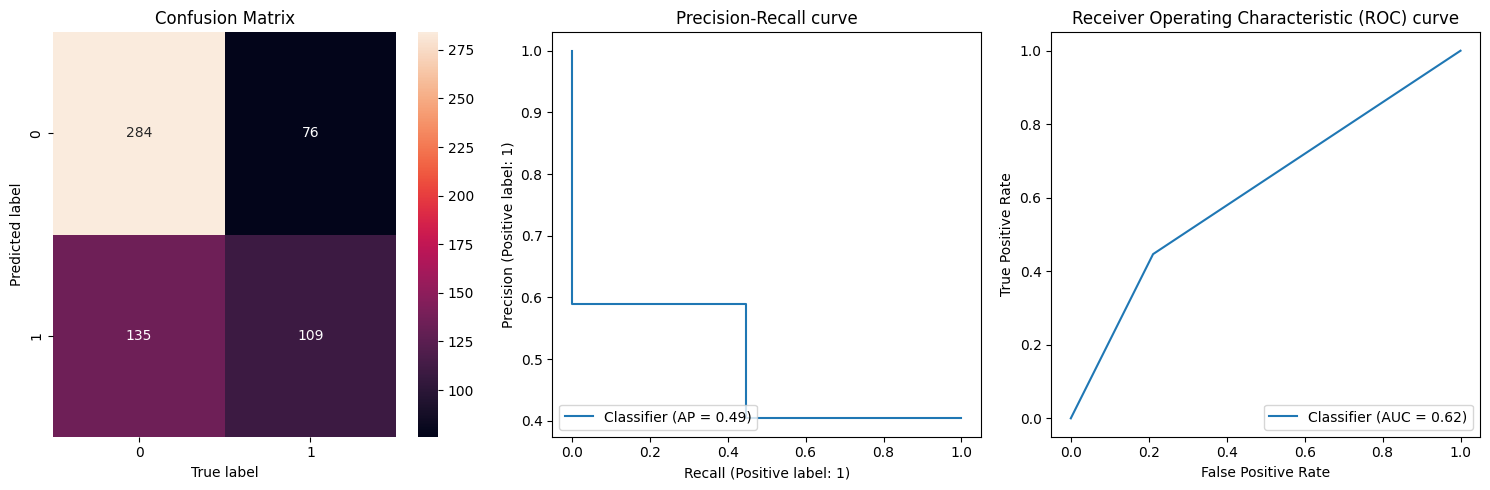

RNN with hyperparameter tuning
f1-score: 50.82%
Precision: 58.92%
Recall: 44.67%
Accuracy: 65.07%


In [187]:
# Create a new model with the best parameters
best_rnn = create_rnn_model(num_units_1=rnn_grid_result.best_params_['num_units_1'],
                        num_units_2=rnn_grid_result.best_params_['num_units_2'])

# Fit the best DNN and store history
best_rnn_history = best_rnn.fit(x_train, y_train,
             validation_data=(x_val, y_val),
             epochs=100,
             callbacks=[early_stopping, reduce_lr],
             verbose=1)

# Make predictions
y_pred_rnn = best_rnn.predict(x_test)
y_pred_rnn_binary = (y_pred_rnn > 0.5).astype(int)

# Tabulate results
rnn_results = print_metrics(best_rnn, y_pred_rnn_binary, "RNN with hyperparameter tuning", best_rnn_history.history, results_table)
results_table.append(rnn_results)

RNN with ADASYN

In [93]:
# Grid Search RNN with ADASYN
# Applying upsampling using in of ADASYN for the training data due to imbalance in data
rnn_grid_result_ada = grid_rnn.fit(x_train_ada, y_train_ada,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

# print out the best score and hyperparameters
print(f'Best hyperparameters: {rnn_grid_result_ada.best_params_}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/50
223/223 [==============================] - 4s 8ms/step - loss: 0.7058 - accuracy: 0.4941 - f1_m: 0.5924 - val_loss: 0.6983 - val_accuracy: 0.5140 - val_f1_m: 0.4426
Epoch 2/50
223/223 [==============================] - 1s 6ms/step - loss: 0.6947 - accuracy: 0.4806 - f1_m: 0.4000 - val_loss: 0.6967 - val_accuracy: 0.4953 - val_f1_m: 0.4516
Epoch 3/50
223/223 [==============================] - 1s 6ms/step - loss: 0.6938 - accuracy: 0.5053 - f1_m: 0.5102 - val_loss: 0.6968 - val_accuracy: 0.4766 - val_f1_m: 0.4614
Epoch 4/50
223/223 [==============================] - 1s 6ms/step - loss: 0.6925 - accuracy: 0.5110 - f1_m: 0.5630 - val_loss: 0.6951 - val_accuracy: 0.4916 - val_f1_m: 0.4733
Epoch 5/50
223/223 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.5222 - f1_m: 0.6002 - val_loss: 0.6949 - val_accuracy: 0.4804 - val_f1_m: 0.4714
Epoch 6/50
223/223 [==============================] - 1s 6ms

Epoch 1/100
334/334 [==============================] - 4s 7ms/step - loss: 0.6947 - accuracy: 0.5056 - f1_m: 0.4142 - val_loss: 0.7015 - val_accuracy: 0.4187 - val_f1_m: 0.4893 - lr: 0.0010
Epoch 2/100
334/334 [==============================] - 2s 7ms/step - loss: 0.6889 - accuracy: 0.5360 - f1_m: 0.5688 - val_loss: 0.6944 - val_accuracy: 0.4841 - val_f1_m: 0.4474 - lr: 0.0010
Epoch 3/100
334/334 [==============================] - 2s 6ms/step - loss: 0.6876 - accuracy: 0.5435 - f1_m: 0.5671 - val_loss: 0.6811 - val_accuracy: 0.5757 - val_f1_m: 0.2811 - lr: 0.0010
Epoch 4/100
334/334 [==============================] - 2s 6ms/step - loss: 0.6805 - accuracy: 0.5641 - f1_m: 0.5593 - val_loss: 0.6830 - val_accuracy: 0.5495 - val_f1_m: 0.3330 - lr: 0.0010
Epoch 5/100
334/334 [==============================] - 2s 6ms/step - loss: 0.6633 - accuracy: 0.5941 - f1_m: 0.5546 - val_loss: 0.7046 - val_accuracy: 0.5009 - val_f1_m: 0.4471 - lr: 0.0010
Epoch 6/100
334/334 [=============================

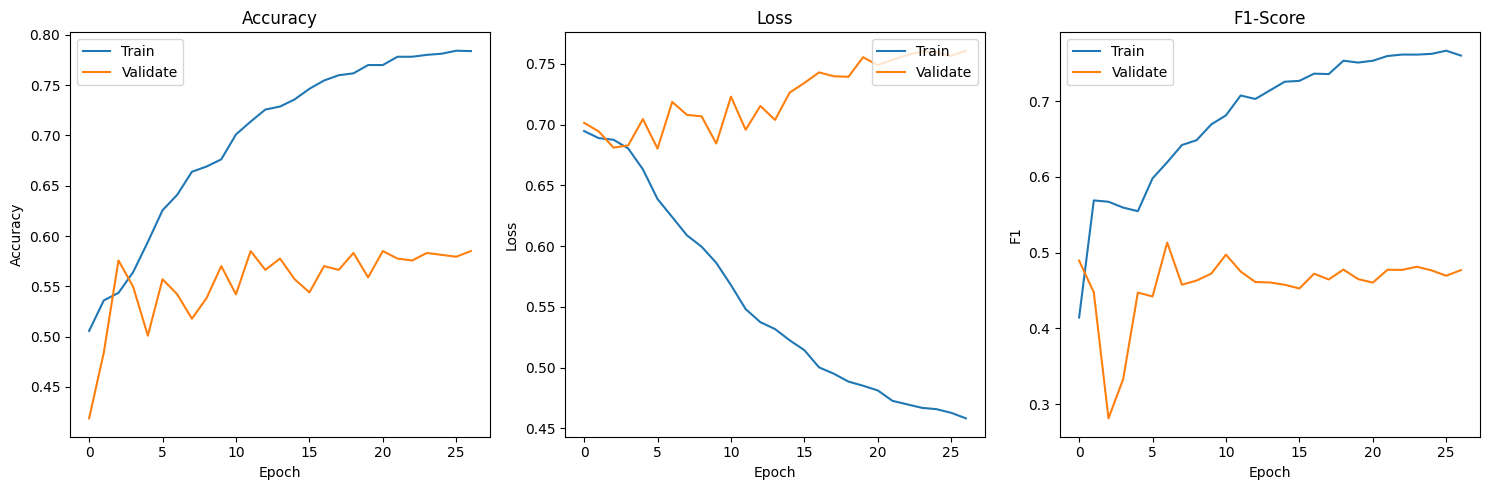

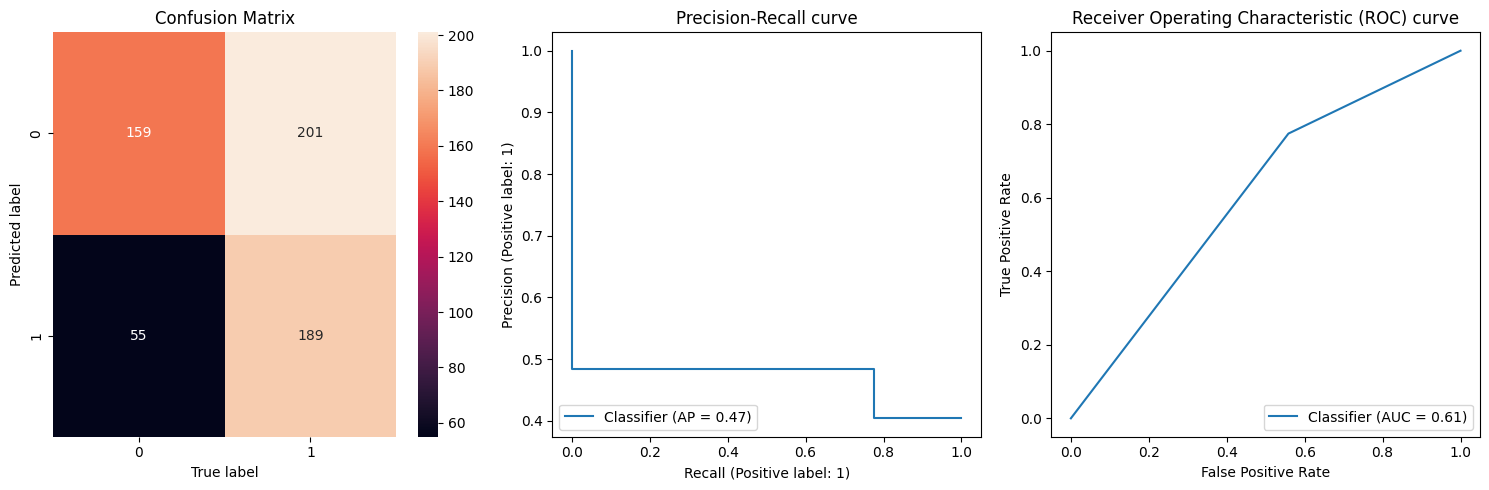

RNN with ADASYN and hyperparameter tuning
f1-score: 59.62%
Precision: 48.46%
Recall: 77.46%
Accuracy: 57.62%


In [188]:
# Create a new model with the best parameters
best_rnn_ada = create_rnn_model(num_units_1=rnn_grid_result_ada.best_params_['num_units_1'],
                            num_units_2=rnn_grid_result_ada.best_params_['num_units_2'])

best_rnn_ada_history = best_rnn_ada.fit(x_train_ada, y_train_ada,
             validation_data=(x_val, y_val),
             epochs=100,
             batch_size=8,
             callbacks=[early_stopping, reduce_lr],
             verbose=1)

# Make predictions
y_pred_rnn_ada = best_rnn_ada.predict(x_test)
y_pred_rnn_ada_binary = (y_pred_rnn_ada > 0.5).astype(int)

# Tabulate results
rnn_results_ada = print_metrics(best_rnn_ada, y_pred_rnn_ada_binary, "RNN with ADASYN and hyperparameter tuning", best_rnn_ada_history.history, results_table)
results_table.append(rnn_results_ada)

### DNN with hyperparameter tuning

In [130]:
DNN_input_shape = (9, 1)

def create_dnn_model(num_layers=9, num_neurons=9, batch_size=8, learning_rate=0.001, decay=0.0003, random_state=0):
    # create model
    model = Sequential()
    # add input layer and flatten the input data
    model.add(Flatten(input_shape=DNN_input_shape))
    # add hidden layers
    for i in range(num_layers):
        model.add(BatchNormalization())
        model.add(Dense(num_neurons, kernel_initializer='he_normal', activation='relu'))
    # add output layer with softmax activation function
    model.add(Dense(1, activation='sigmoid'))

    # compile model using categorical crossentropy loss function
    optimizer = optimizers.Adam(learning_rate=learning_rate, decay=decay)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_m])
    
    return model

# compile model using categorical crossentropy loss function
model = KerasClassifier(build_fn=create_dnn_model,
                        epochs=50,
                        batch_size=8,
                        num_layers=6,
                        num_neurons=9,
                        learning_rate=0.01,
                        decay=0.0003)

# define the grid search parameters
param_grid = {
    'num_neurons': [6, 9],
    'num_layers': [6, 9],
    'batch_size': [8, 16]
}

# create a GridSearchCV object and fit it to the data
grid_dnn = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    verbose=1,
                    cv=3,
                    scoring=f1_m)

dnn_grid_result = grid_dnn.fit(x_train, y_train,
                    validation_data=(x_val, y_val))

# print out the best hyperparameters
print(f'Best hyperparameters: {dnn_grid_result.best_params_}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/50
178/178 [==============================] - 3s 5ms/step - loss: 0.6816 - accuracy: 0.5920 - f1_m: 0.1421 - val_loss: 0.6750 - val_accuracy: 0.6075 - val_f1_m: 0.0000e+00
Epoch 2/50
178/178 [==============================] - 1s 4ms/step - loss: 0.6704 - accuracy: 0.6124 - f1_m: 0.0037 - val_loss: 0.6820 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00
Epoch 3/50
178/178 [==============================] - 1s 4ms/step - loss: 0.6696 - accuracy: 0.6131 - f1_m: 0.0000e+00 - val_loss: 0.6666 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00
Epoch 4/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6681 - accuracy: 0.6131 - f1_m: 0.0000e+00 - val_loss: 0.6702 - val_accuracy: 0.6131 - val_f1_m: 0.0000e+00
Epoch 5/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6672 - accuracy: 0.6131 - f1_m: 0.0000e+00 - val_loss: 0.6683 - val_accuracy: 0.6131 - val_f1_m: 0.0174
Epoch 6/50
178/178 [============

Epoch 1/100
67/67 [==============================] - 2s 8ms/step - loss: 0.9675 - accuracy: 0.3903 - f1_m: 0.5510 - val_loss: 0.9993 - val_accuracy: 0.4523 - val_f1_m: 0.4197 - lr: 0.0010
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 0.7892 - accuracy: 0.4305 - f1_m: 0.5153 - val_loss: 0.7795 - val_accuracy: 0.5121 - val_f1_m: 0.3207 - lr: 0.0010
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 0.7289 - accuracy: 0.5232 - f1_m: 0.4190 - val_loss: 0.7262 - val_accuracy: 0.5607 - val_f1_m: 0.2852 - lr: 0.0010
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5564 - f1_m: 0.3227 - val_loss: 0.7042 - val_accuracy: 0.5738 - val_f1_m: 0.2472 - lr: 0.0010
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5873 - f1_m: 0.3026 - val_loss: 0.6922 - val_accuracy: 0.5850 - val_f1_m: 0.2136 - lr: 0.0010
Epoch 6/100
67/67 [==============================] - 0s 4ms/

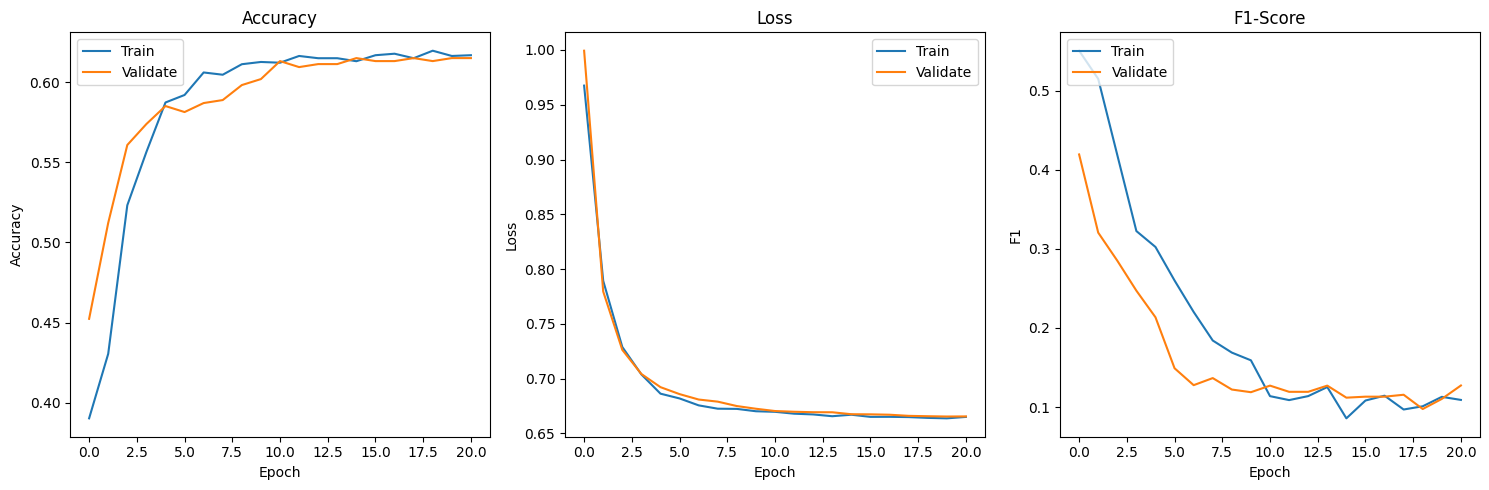

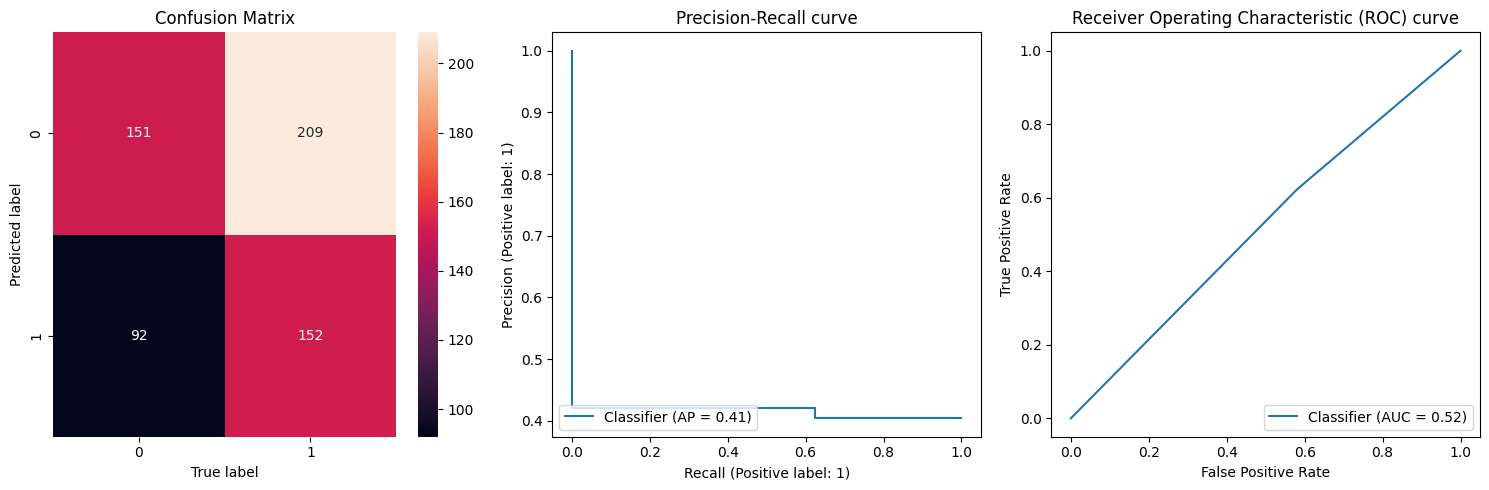

DNN with hyperparameter tuning
f1-score: 50.25%
Precision: 42.11%
Recall: 62.30%
Accuracy: 50.17%


In [246]:
# Create a new model with the best parameters
best_dnn = create_dnn_model(num_neurons=dnn_grid_result.best_params_['num_neurons'],
                        num_layers=dnn_grid_result.best_params_['num_layers'],
                        batch_size=dnn_grid_result.best_params_['batch_size'])

# Fit the best DNN and store history
best_dnn_history = best_dnn.fit(x_train, y_train,
             validation_data=(x_val, y_val),
             epochs=100,
             callbacks=[early_stopping, reduce_lr],
             verbose=1)

# Make predictions
y_pred_dnn = best_dnn.predict(x_test)
y_pred_dnn_binary = (y_pred_dnn > 0.5).astype(int)

# Tabulate results
dnn_results = print_metrics(best_dnn, y_pred_dnn_binary, "DNN with hyperparameter tuning", best_dnn_history.history, results_table)
results_table.append(dnn_results)

DNN with Adasyn

In [98]:
# Grid Search DNN with ADASYN
dnn_grid_result_ada = grid_dnn.fit(x_train_ada, y_train_ada,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

# print out the best score and hyperparameters
print(f'Best hyperparameters: {dnn_grid_result_ada.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Epoch 1/50
223/223 [==============================] - 4s 6ms/step - loss: 0.7122 - accuracy: 0.5222 - f1_m: 0.5314 - val_loss: 0.7098 - val_accuracy: 0.5215 - val_f1_m: 0.4225
Epoch 2/50
223/223 [==============================] - 1s 4ms/step - loss: 0.7034 - accuracy: 0.4907 - f1_m: 0.4514 - val_loss: 0.6876 - val_accuracy: 0.5738 - val_f1_m: 0.3612
Epoch 3/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6959 - accuracy: 0.5048 - f1_m: 0.4546 - val_loss: 0.7074 - val_accuracy: 0.5140 - val_f1_m: 0.3264
Epoch 4/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.5003 - f1_m: 0.4020 - val_loss: 0.7001 - val_accuracy: 0.4729 - val_f1_m: 0.3861
Epoch 5/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6950 - accuracy: 0.5042 - f1_m: 0.4527 - val_loss: 0.6833 - val_accuracy: 0.5981 - val_f1_m: 0.1623
Epoch 6/50
223/223 [==============================] - 1s 4ms

Epoch 1/100
84/84 [==============================] - 2s 7ms/step - loss: 0.7412 - accuracy: 0.5079 - f1_m: 0.4609 - val_loss: 0.6855 - val_accuracy: 0.5495 - val_f1_m: 0.3800 - lr: 0.0010
Epoch 2/100
84/84 [==============================] - 0s 4ms/step - loss: 0.7027 - accuracy: 0.5176 - f1_m: 0.5191 - val_loss: 0.6947 - val_accuracy: 0.5178 - val_f1_m: 0.3813 - lr: 0.0010
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5458 - f1_m: 0.5624 - val_loss: 0.6983 - val_accuracy: 0.4916 - val_f1_m: 0.3712 - lr: 0.0010
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5326 - f1_m: 0.5358 - val_loss: 0.7017 - val_accuracy: 0.4916 - val_f1_m: 0.4155 - lr: 0.0010
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5570 - f1_m: 0.5381 - val_loss: 0.6995 - val_accuracy: 0.5047 - val_f1_m: 0.4503 - lr: 0.0010
Epoch 6/100
78/84 [==========================>...] - ETA: 0s

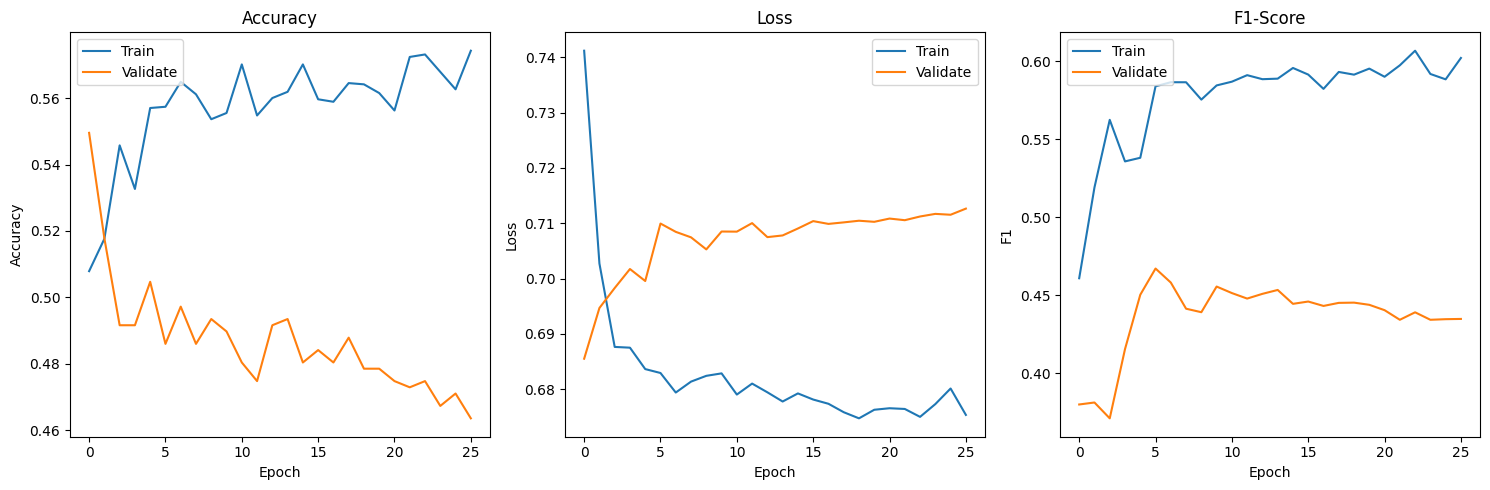

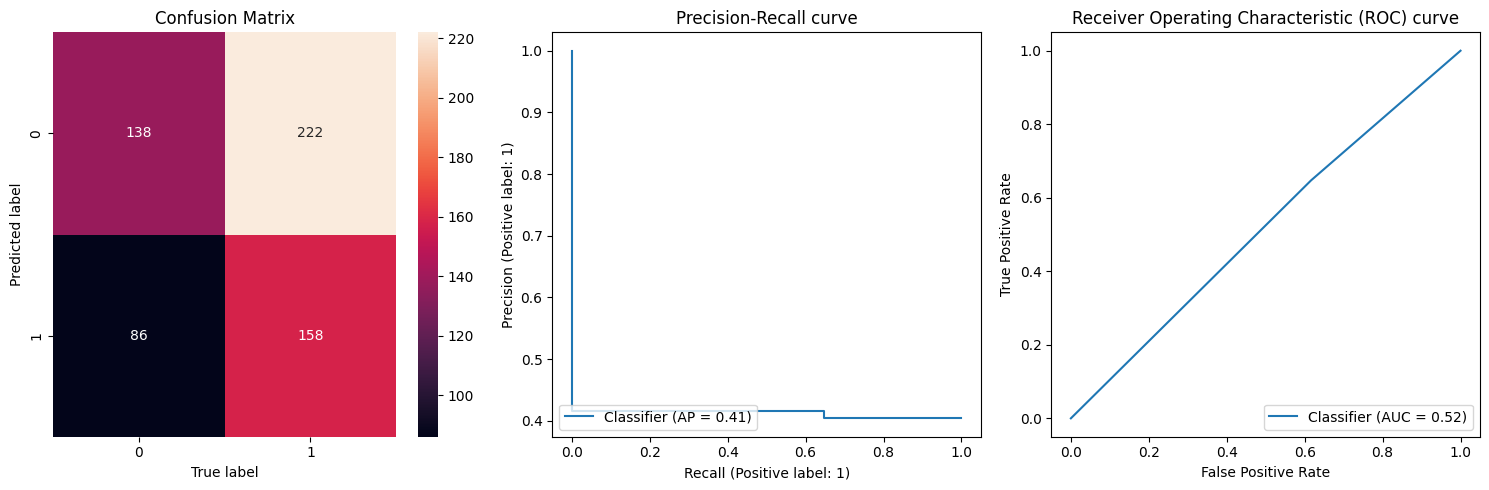

DNN with ADASYN and hyperparameter tuning
f1-score: 50.64%
Precision: 41.58%
Recall: 64.75%
Accuracy: 49.01%


In [247]:
# Create a new model with the best parameters
best_dnn_ada = create_dnn_model(num_neurons=dnn_grid_result_ada.best_params_['num_neurons'],
                        num_layers=dnn_grid_result_ada.best_params_['num_layers'],
                        batch_size=dnn_grid_result_ada.best_params_['batch_size'])

best_dnn_ada_history = best_dnn_ada.fit(x_train_ada, y_train_ada,
             validation_data=(x_val, y_val),
             epochs=100,
             callbacks=[early_stopping, reduce_lr],
             verbose=1)

# Make predictions
y_pred_dnn_ada = best_dnn_ada.predict(x_test)
y_pred_dnn_ada_binary = (y_pred_dnn_ada > 0.5).astype(int)

# Tabulate results
dnn_results_ada = print_metrics(best_dnn_ada, y_pred_dnn_ada_binary, "DNN with ADASYN and hyperparameter tuning", best_dnn_ada_history.history, results_table)
results_table.append(dnn_results_ada)

## Results tables

In [241]:
# If we need to remove rows
# results_table = results_table[:-1]

In [248]:
# Tabulate and display and format the classifier results
baselearners_df = pd.DataFrame(results_table, 
                               columns = ["Classifier","F1-score","Precision","Recall","Accuracy"])
with pd.option_context('display.precision', 2):
    formatted_table=(baselearners_df.style.background_gradient(cmap ='Blues'))
formatted_table

In [249]:
# Sort to check the highest performing models
sorted_df = baselearners_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
sorted_df

sorted_df_table=(sorted_df.style.background_gradient(cmap ='Blues'))
sorted_df_table

## Ensemble Hard Voting

Ensemble with best scored model y_predictions
f1-score: 63.21%
Precision: 56.01%
Recall: 72.54%
Accuracy: 65.89%
Confusion matrix


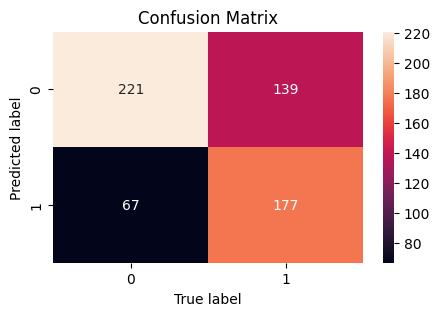

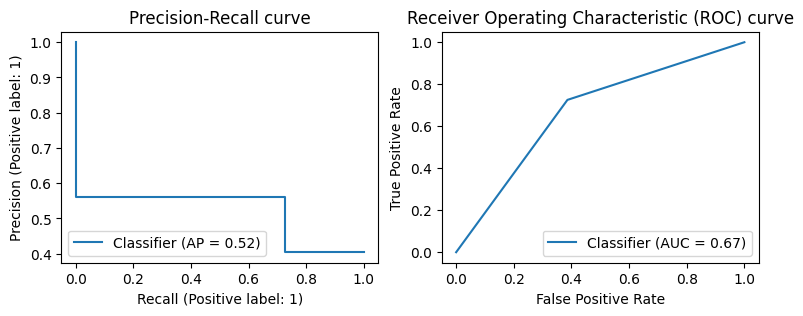

In [250]:
from scipy.stats import mode
y_pred_cnn_ada_binary = np.squeeze(y_pred_cnn_ada_binary)
y_pred_rnn_ada_binary = np.squeeze(y_pred_rnn_ada_binary)
y_pred_dnn_ada_binary = np.squeeze(y_pred_dnn_ada_binary)

# assume all y_predictions are arrays containing predicted labels from each model
y_pred = [y_pred_cnn_ada_binary, y_pred_rnn_ada_binary, y_pred_dnn_ada_binary, y_pred_voting_soft]

# compute the ensemble prediction by taking the mode of the predicted labels
y_pred_voting_hard_full = mode(y_pred, axis=0).mode[0]

# Obtain f1-score, precision and Recall values to determine the performance of the model
f1Score = f1_score(y_test, y_pred_voting_hard_full)
precisionVal = precision_score(y_test, y_pred_voting_hard_full)
recallVal = recall_score(y_test, y_pred_voting_hard_full)
acc = accuracy_score(y_test, y_pred_voting_hard_full)

print("Ensemble with best scored model y_predictions")
print("f1-score: {:.2f}%".format(f1Score*100))
print("Precision: {:.2f}%".format(precisionVal*100))
print("Recall: {:.2f}%".format(recallVal*100))
print("Accuracy: {:.2f}%".format(acc*100))

# Plotting confusion matrix for true vs predicted values
print("Confusion matrix")
plt.figure(figsize=(5,3))
cm = confusion_matrix(y_test, y_pred_voting_hard_full)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

# Plot Precision-Recall curve in the first subplot
prCurve = PrecisionRecallDisplay.from_predictions(y_test, y_pred_voting_hard_full, ax=axs[0])
_ = prCurve.ax_.set_title("Precision-Recall curve")

# Plot ROC curve in the second subplot
rocCurve = RocCurveDisplay.from_predictions(y_test, y_pred_voting_hard_full, ax=axs[1])

_ = rocCurve.ax_.set_title("Receiver Operating Characteristic (ROC) curve")
_ = axs[1].set_xlabel('False Positive Rate')
_ = axs[1].set_ylabel('True Positive Rate')

plt.show()

hv_list = ["Manual Hard Voting", f1Score*100, precisionVal*100, recallVal*100, acc*100]

results_table.append(hv_list)

In [251]:
# Tabulate and display and format the classifier results
baselearners_df = pd.DataFrame(results_table, 
                               columns = ["Classifier","F1-score","Precision","Recall","Accuracy"])
with pd.option_context('display.precision', 2):
    formatted_table=(baselearners_df.style.background_gradient(cmap ='Blues'))
formatted_table

In [252]:
# Sort to check the highest performing models
sorted_df = baselearners_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
sorted_df

sorted_df_table=(sorted_df.style.background_gradient(cmap ='Blues'))
sorted_df_table

In [253]:
del Full_results
Full_results = pd.concat([sorted_df, ensemble_df], ignore_index=True)
Full_results = Full_results.sort_values(by='F1-score', ascending=False)
Full_results=(Full_results.style.background_gradient(cmap ='Blues'))
Full_results